In [1]:
%%

codeRoot = './code'
% if isempty(codeRoot)
%     codeRoot = matlab.desktop.editor.getActiveFilename();
%     codeRoot = regexprep(codeRoot,'/[^/]*$','')    
% end

cLoadPath = sprintf('%s/utils/loadProjectPath.m',codeRoot);
run(cLoadPath)

cd(envVar.outDir);

%% Settings

envVar.reRunAnalysis = 0;


codeRoot =

    './code'

Loading Lung Tumor Evolution pkg enviornment
            pkgRoot: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution'
            codeDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/code/'
    externalCodeDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/external/'
           dataRoot: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/'
          intRefDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/intRefDir/'
             outDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/output/'



In [2]:
%% Data

mmLungPlate_fQC = load([ envVar.dataRoot 'mmLungKP_timecourse.mat' ]);

%%

zTimeSimple = mmLungPlate_fQC.timesimple;
zStageList = unique(zTimeSimple)

%%

zTestList = [];
zi = 1;

zTestList{zi}{1} = '01_T_early_ND'; %T - K2
zTestList{zi}{2} = '02_KorKP_early_ND';
zi = zi + 1;

% K only
zTestList{zi}{1} = '02_KorKP_early_ND'; %K2 - K12
zTestList{zi}{2} = '04_K_12w_ND'; 
zi = zi + 1;

 
zTestList{zi}{1} = '04_K_12w_ND'; %K12 - K30
zTestList{zi}{2} = '05_K_30w_ND';
zi = zi + 1;

 % KP Only
zTestList{zi}{1} = '02_KorKP_early_ND'; %K3 - K12
zTestList{zi}{2} = '06_KP_12w_ND';
zi = zi + 1;

zTestList{zi}{1} = '06_KP_12w_ND'; %K12 - K20
zTestList{zi}{2} = '07_KP_20w_ND';
zi = zi + 1;

zTestList{zi}{1} = '07_KP_20w_ND'; %K20 - K30w
zTestList{zi}{2} = '08_KP_30w_ND';
zi = zi + 1;


zStageList =

  7x1 cell array

    {'01_T_early_ND'    }
    {'02_KorKP_early_ND'}
    {'04_K_12w_ND'      }
    {'05_K_30w_ND'      }
    {'06_KP_12w_ND'     }
    {'07_KP_20w_ND'     }
    {'08_KP_30w_ND'     }



In [3]:
%% Note this takes a while if re-running

runSection = 0;
if envVar.reRunAnalysis || runSection
    
    zParam = loadjson([ envVar.dataRoot 'calcRunWOT_basic_plate_withTime.json' ]);

    
    zOutPath = './WOT_redo/'
    mkdir(zOutPath)

    otModelNew = wrapper_calcRunWOT(mmLungPlate_fQC,zOutPath,zParam,[])

else 

    [zFiles,~,zNames] = fileList([ envVar.dataRoot 'WOT/*' ])
    zNames = regexprep(zNames,'\.mat','')

    clear otModelNew
    for i = 1:length(zFiles)
        zOtSingle = load(zFiles{i})
        zf = setdiff(fieldnames(zOtSingle),{'outStat','clId','testSet','opts','sampleID'});
        %%
        for zj = 1:length(zf)
            zVar = zOtSingle.(zf{zj});

            if iscell(zVar)
                otModelNew.(zf{zj}){i} = zVar{1};
            else
                otModelNew.(zf{zj}){i} = zVar;
            end
        end

        otModelNew.clId(i) = zOtSingle.clId;

        otModelNew.outStat.coutMat{i} = zOtSingle.outStat.countMat{1};
        otModelNew.outStat.countMatSq{i} = zOtSingle.outStat.countMatSq{1};
        otModelNew.outStat.countDenom{i} = zOtSingle.outStat.countDenom{1};
        otModelNew.testSet{i} = zOtSingle.testSet{1};
    end

end


zFiles =

  6x1 cell array

    {'/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/WOT/WOT_all_01.mat'}
    {'/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/WOT/WOT_all_02.mat'}
    {'/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/WOT/WOT_all_03.mat'}
    {'/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/WOT/WOT_all_04.mat'}
    {'/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/WOT/WOT_all_05.mat'}
    {'/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/WOT/WOT_all_06.mat'}


zNames =

  6x1 cell array

    {'WOT_all_01.mat'}
    {'WOT_all_02.mat'}
    {'WOT_all_03.mat'}
    {'WOT_all_04.mat'}
    {'WOT_all_05.mat'}
    {'WOT_all_06.mat'}


zNames =

  6x1 cell array

    {'WOT_all_01'}
    {'WOT_all_02'}
    {'WOT_all_03'}
    {'WOT_all_04'}
    {'WOT_all_05'}
    {'WOT_all_06'}


zOtSingle = 

  struct with fields:

  

In [4]:
%%

zTimeSimple = mmLungPlate_fQC.timesimple;
tabFilter(zTimeSimple)

zSel = strcmp(mmLungPlate_fQC.timesimple,'01_T_early_ND');
zCluster = mmLungPlate_fQC.annot.clusterK12;
zCluster(zSel) = 0;

zopts = [];
zopts.minFrac = 0.1;
zopts.minClusterSize = 5;
zopts.normOut = 0;
zopts.normOutDir = 1;
zopts.connectMST = 0;

edgeList = ot_to_ancestorGraph_splitSummary(otModelNew.otMat,otModelNew.outStat,zCluster,otModelNew.testSet,zTimeSimple,zopts);

              Value     Count    Percent
      01_T_early_ND       206      5.29%
  02_KorKP_early_ND       142      3.65%
        04_K_12w_ND       455     11.69%
        05_K_30w_ND       505     12.98%
       06_KP_12w_ND       491     12.62%
       07_KP_20w_ND       538     13.83%
       08_KP_30w_ND      1554     39.94%
-------------------
             Total:      3891    100.00%


  Value     Count    Percent
      1        4    100.00%
      2       12    100.00%
      3       15    100.00%
      4       19    100.00%
      5       17    100.00%
      6       35    100.00%

zG = 

  digraph with properties:

    Edges: [102x4 table]
    Nodes: [13x1 table]


wbc =

    0.0209
    0.0685
    0.0525
    0.2016
    0.1385
    0.0849
    0.0448
    0.0646
    0.0836
    0.0967
    0.0415
    0.0576
    0.0443


p = 

  GraphPlot with properties:

     NodeColor: [0 0.4470 0.7410]
    MarkerSize: [7 14 12 34 25 17 11 14 17 18 10 13 11]
        Marker: 'o'
     EdgeColor: [102x3 double]
     LineWidth: [1x102 double]
     LineStyle: '-'
     NodeLabel: {1x13 cell}
     EdgeLabel: {}
         XData: [1x13 double]
         YData: [10 9 8 2 7 6 5 2 3 4 2 2 1]
         ZData: [0 0 0 0 0 0 0 0 0 0 0 0 0]

  Use GET to show all properties



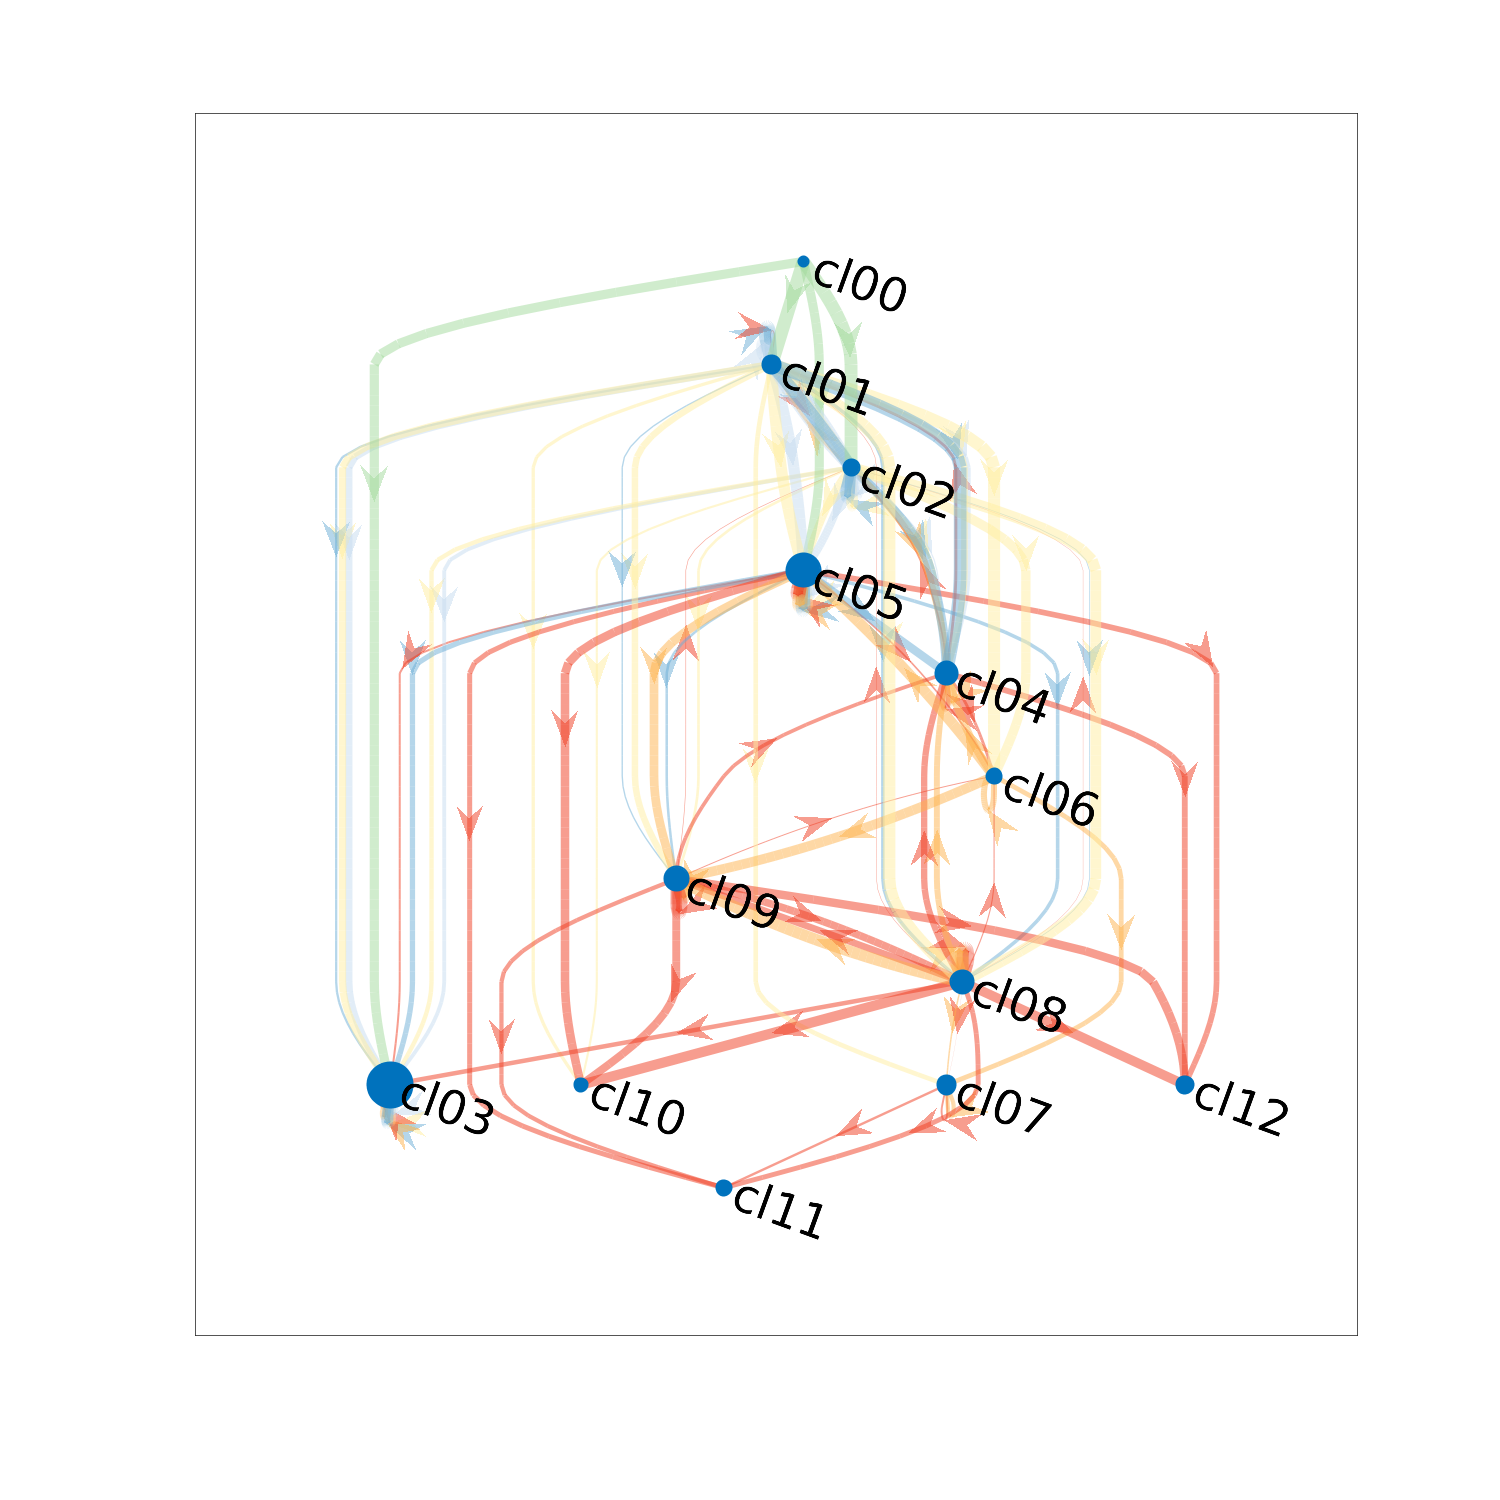

In [6]:
%plot -s 1500,1500
%% Generate a global graph

logit = @(x)log(x) - log(1-x);

edgeList_KP = edgeList;
zTab = struct2table(edgeList_KP);

% Focus on cell states
zSource = regexprep(edgeList_KP.sourceList,'.*_(cl.*)','$1');
zTarget = regexprep(edgeList_KP.targetList,'.*_(cl.*)','$1');

%
zSourceType = regexprep(edgeList_KP.sourceList,'(.*)_(cl.*)','$1');
% [zST,zN] = grp2idx(zSourceType);

zTargetType = regexprep(edgeList_KP.targetList,'(.*)_(cl.*)','$1');
% [zTT,zNT] = grp2idx(zTargetType);
% [zST,zN] = grp2idx(zTarget);
zTargetSortType = cellfun(@(x,y)sprintf('%s_%s',x,y),zSourceType,zTargetType,'uniformoutput',0);

%%

zTab = table(zSource,zTarget,zSourceType,zTargetType,zTargetSortType,edgeList_KP.valList);

%%

zTabSort = sortrows(zTab);
% [zTT,zNT] = grp2idx(zTabSort.zTargetType);
zNT = unique(zTabSort.zTargetType);
zMap = containers.Map(zNT,1:length(zNT));

zTT = nanvalues(zMap,zTabSort.zTargetType);
tabFilter(zTT)

%% Betweeness

zG = digraph(zTabSort.zSource,zTabSort.zTarget,zTabSort.Var6);

%%
clear zEtry;

zEtry.EndNodes = [ zTabSort.zSource zTabSort.zTarget];
zEtry.Weight = zTabSort.Var6;
zEtry.Names = zTabSort.zTargetSortType;
zEtry.TT = zTT;

zG = digraph(struct2table(zEtry))

%
figure('Position',[20 20 1220 1220]);
p = plot(zG,'layout','layered');

% Alteranative weighting scheme
% p.LineWidth = zG.Edges.Weight*20;
% zS = logit(zscore(zG.Edges.Weight));
% zS = zS - min(zS) + 1;

zS = zG.Edges.Weight;
[zX,zFx,zSout] = ecdfQuantile(zS);

p.LineWidth = zSout*10;

p.EdgeColor = cmapFull_TN(zG.Edges.TT,:);

zImp = zG.Edges.Weight;

wbc = centrality(zG,'pagerank','importance',zImp)

zV = round(wbc*150)+4;
p.MarkerSize = zV ;

p.NodeFontSize = 24
p.ArrowSize = 14;


zG = 

  digraph with properties:

    Edges: [102x4 table]
    Nodes: [13x1 table]


p = 

  GraphPlot with properties:

     NodeColor: [0 0.4470 0.7410]
    MarkerSize: 4
        Marker: 'o'
     EdgeColor: [102x3 double]
     LineWidth: [1x102 double]
     LineStyle: '-'
     NodeLabel: {1x13 cell}
     EdgeLabel: {}
         XData: [1x13 double]
         YData: [10 9 8 2 7 6 5 2 3 4 2 2 1]
         ZData: [0 0 0 0 0 0 0 0 0 0 0 0 0]

  Use GET to show all properties


wbc =

    0.0209
    0.0685
    0.0525
    0.2016
    0.1385
    0.0849
    0.0448
    0.0646
    0.0836
    0.0967
    0.0415
    0.0576
    0.0443


p = 

  GraphPlot with properties:

     NodeColor: [0 0.4470 0.7410]
    MarkerSize: [7 14 12 34 25 17 11 14 17 18 10 13 11]
        Marker: 'o'
     EdgeColor: [102x3 double]
     LineWidth: [1x102 double]
     LineStyle: '-'
     NodeLabel: {1x13 cell}
     EdgeLabel: {}
         XData: [1x13 double]
         YData: [10 9 8 2 7 6 5 2 3 4 2 2 1]
         ZData: [0 

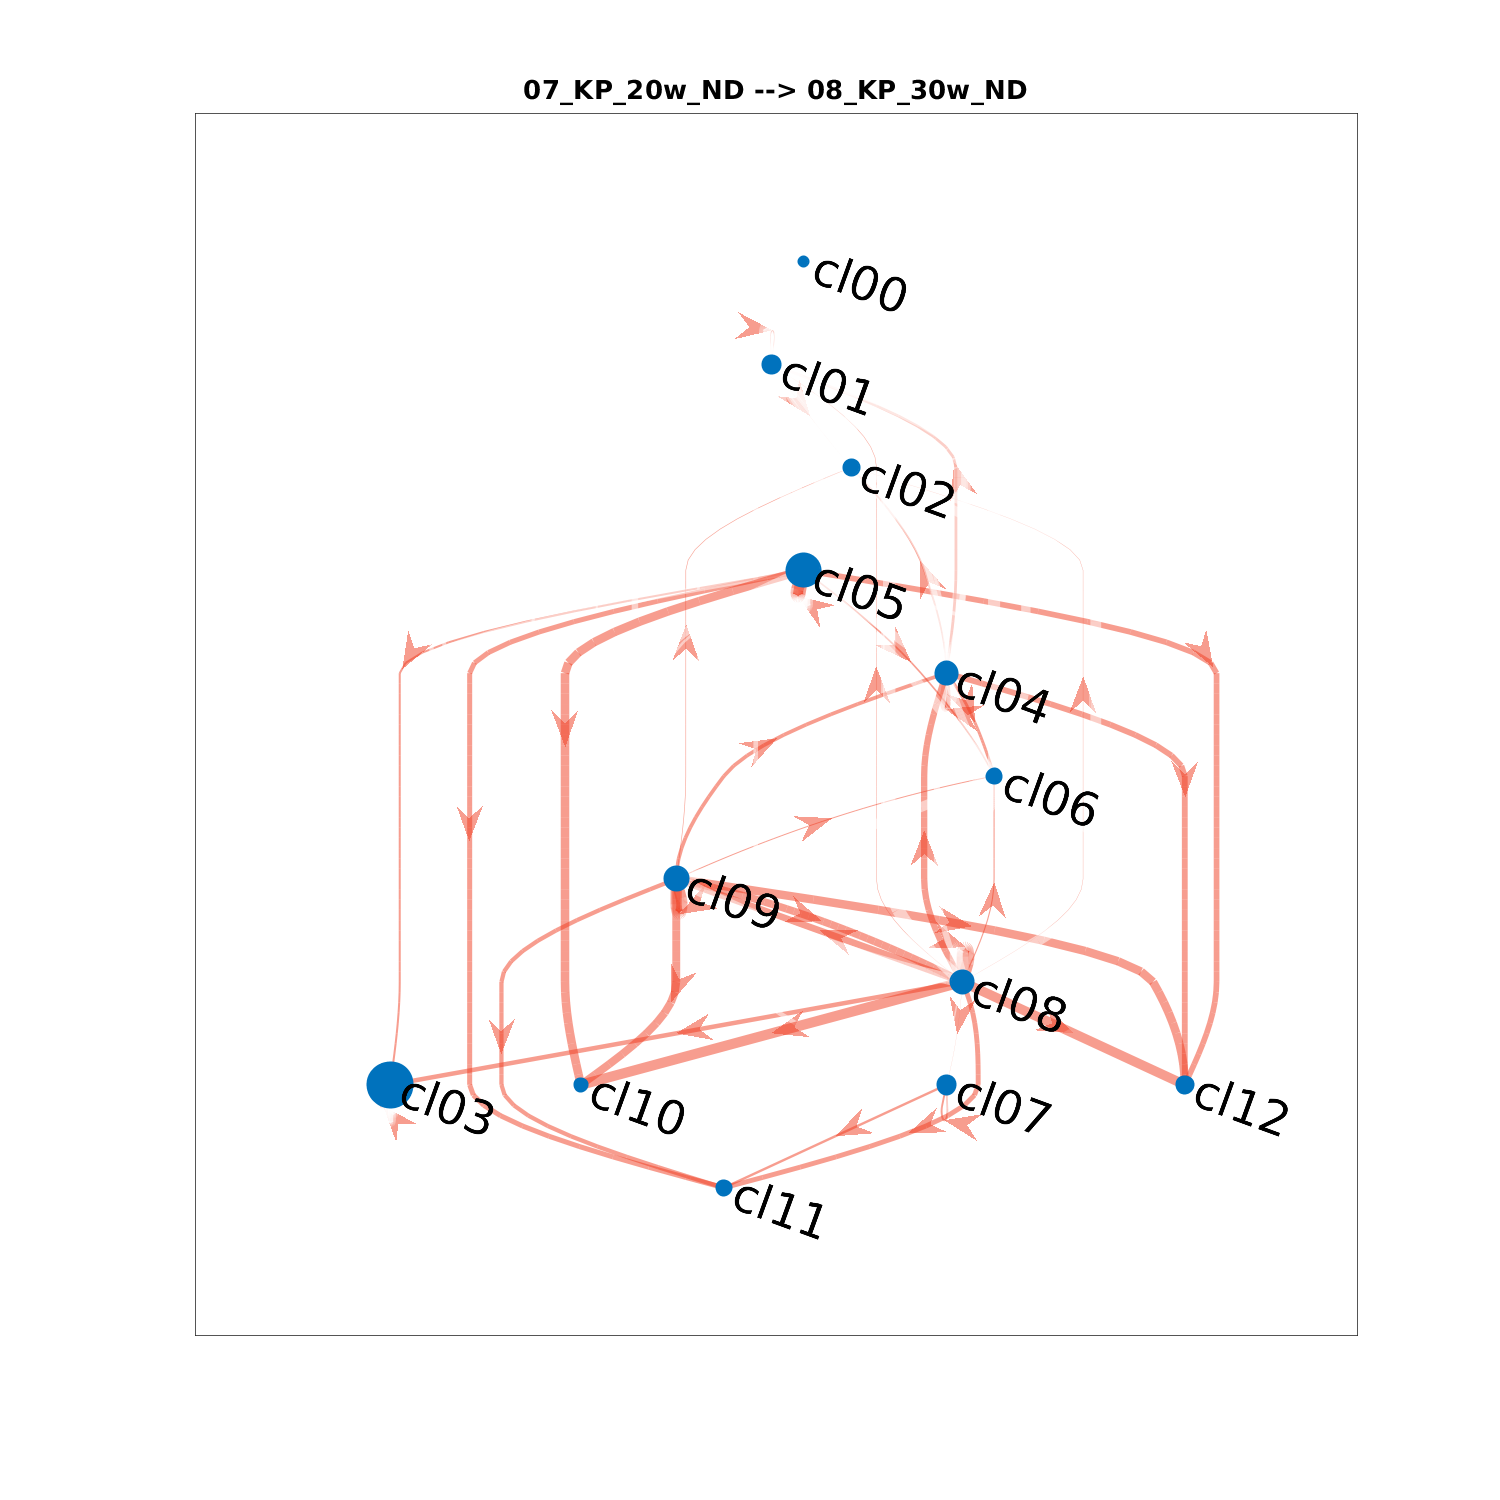

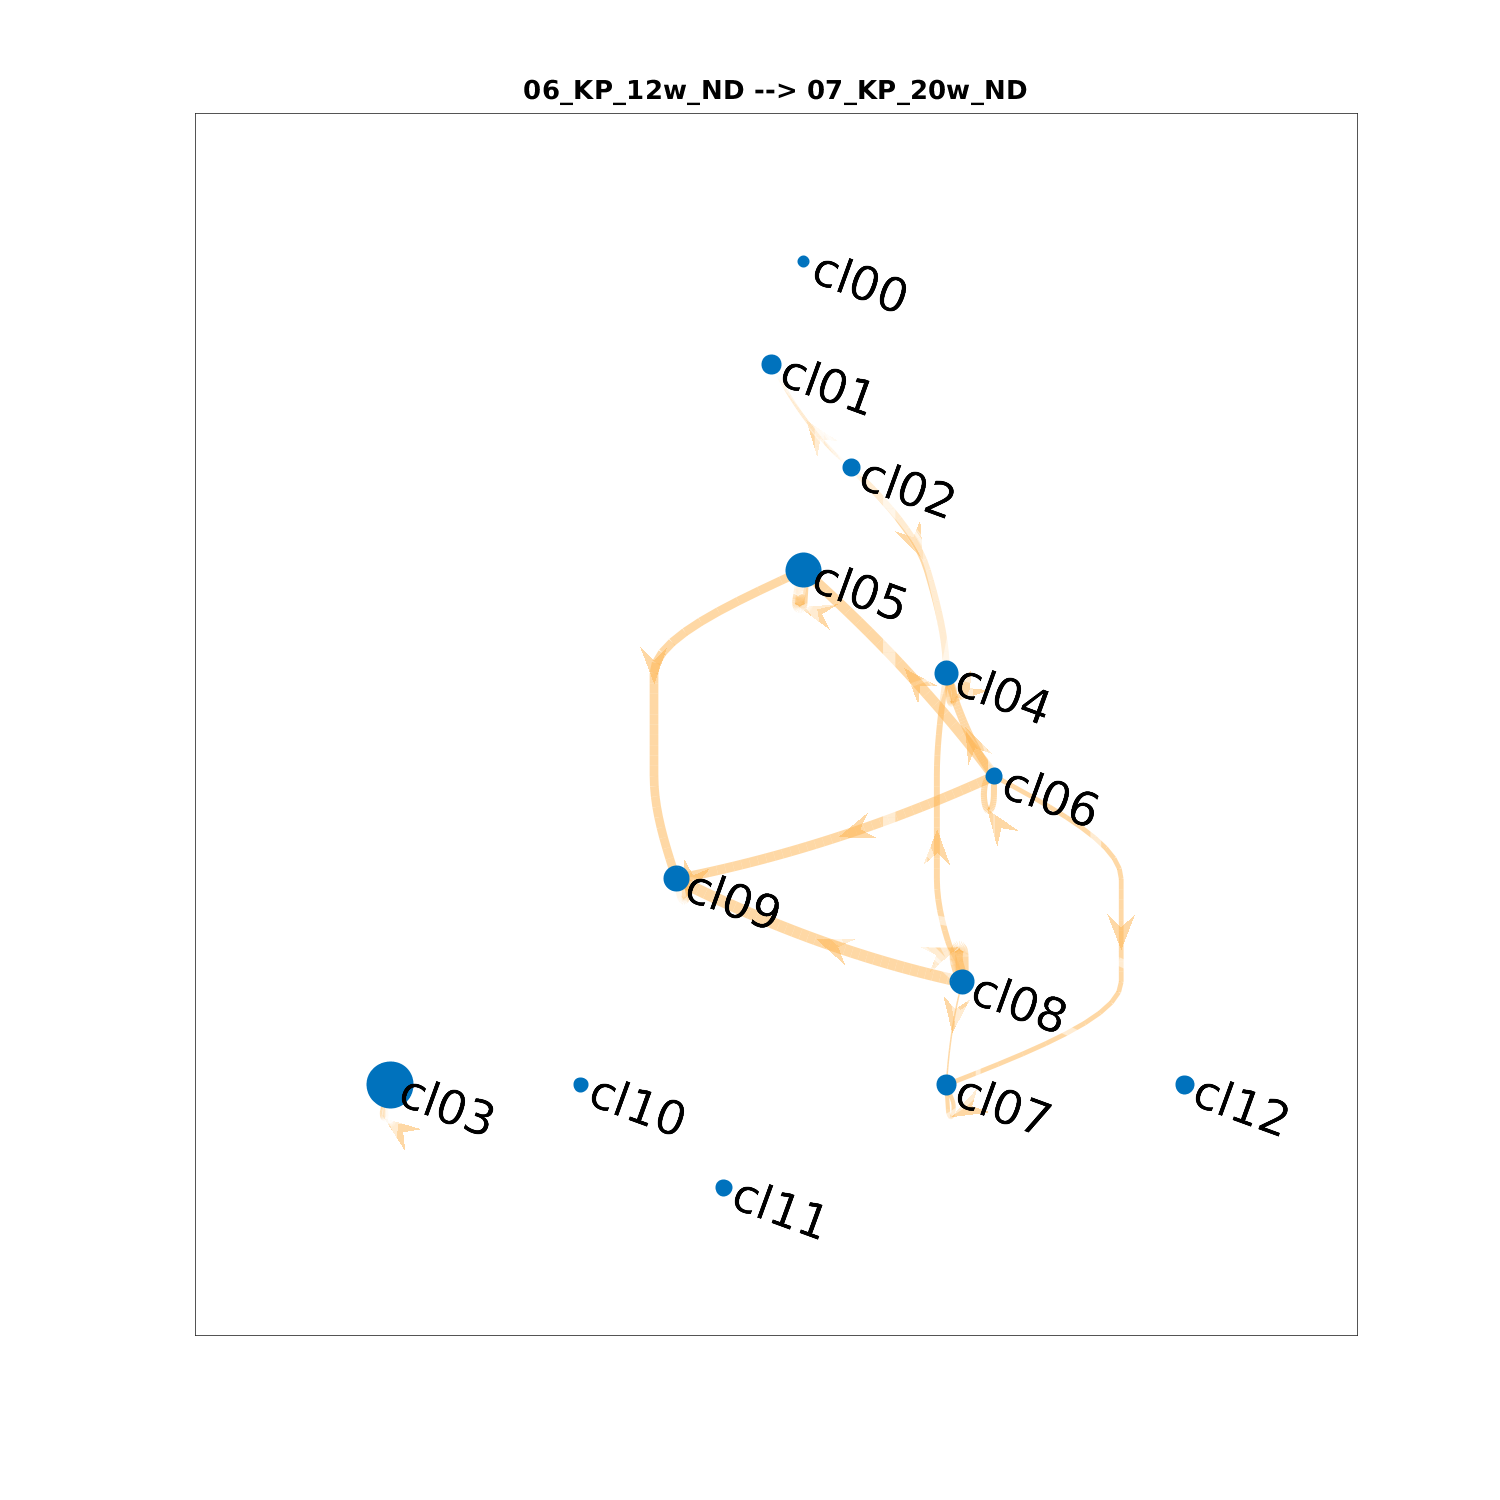

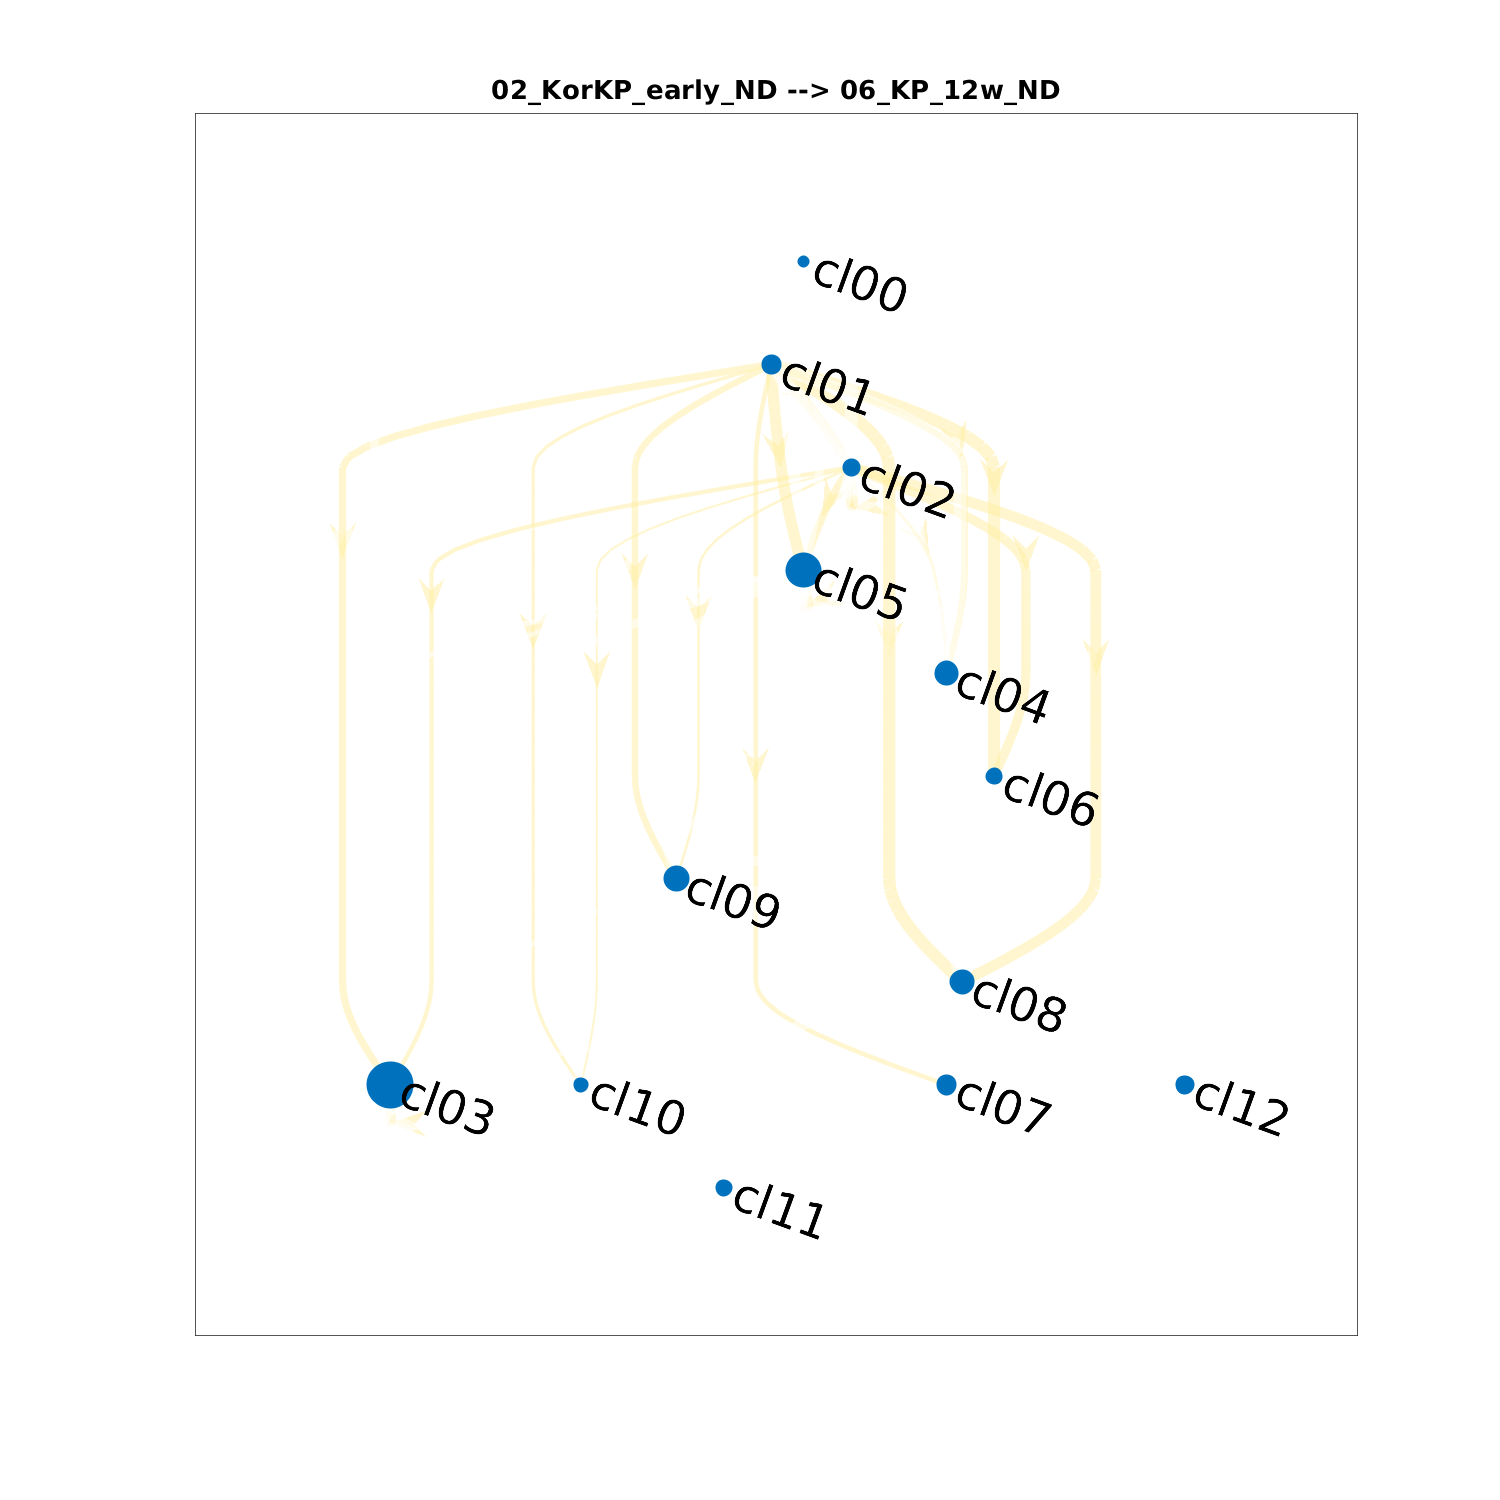

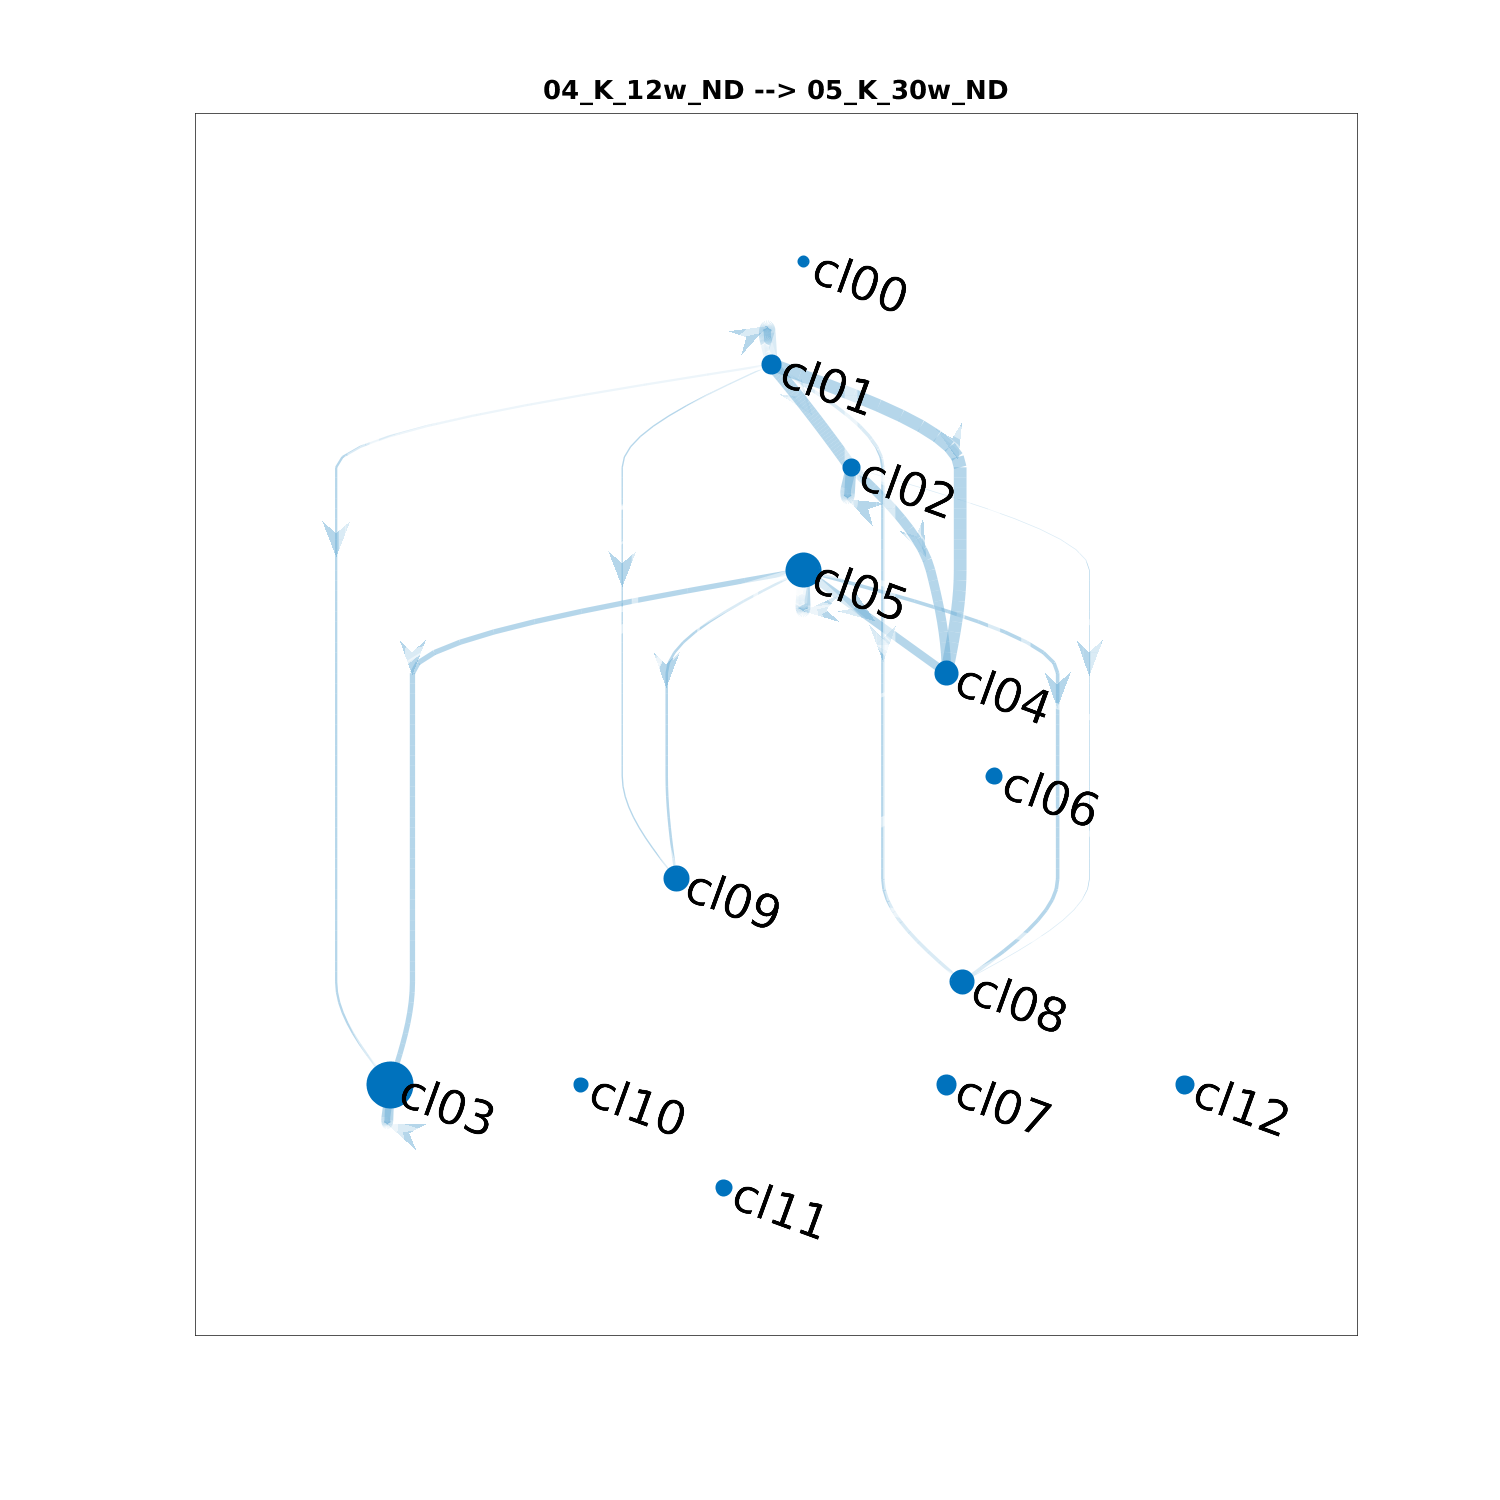

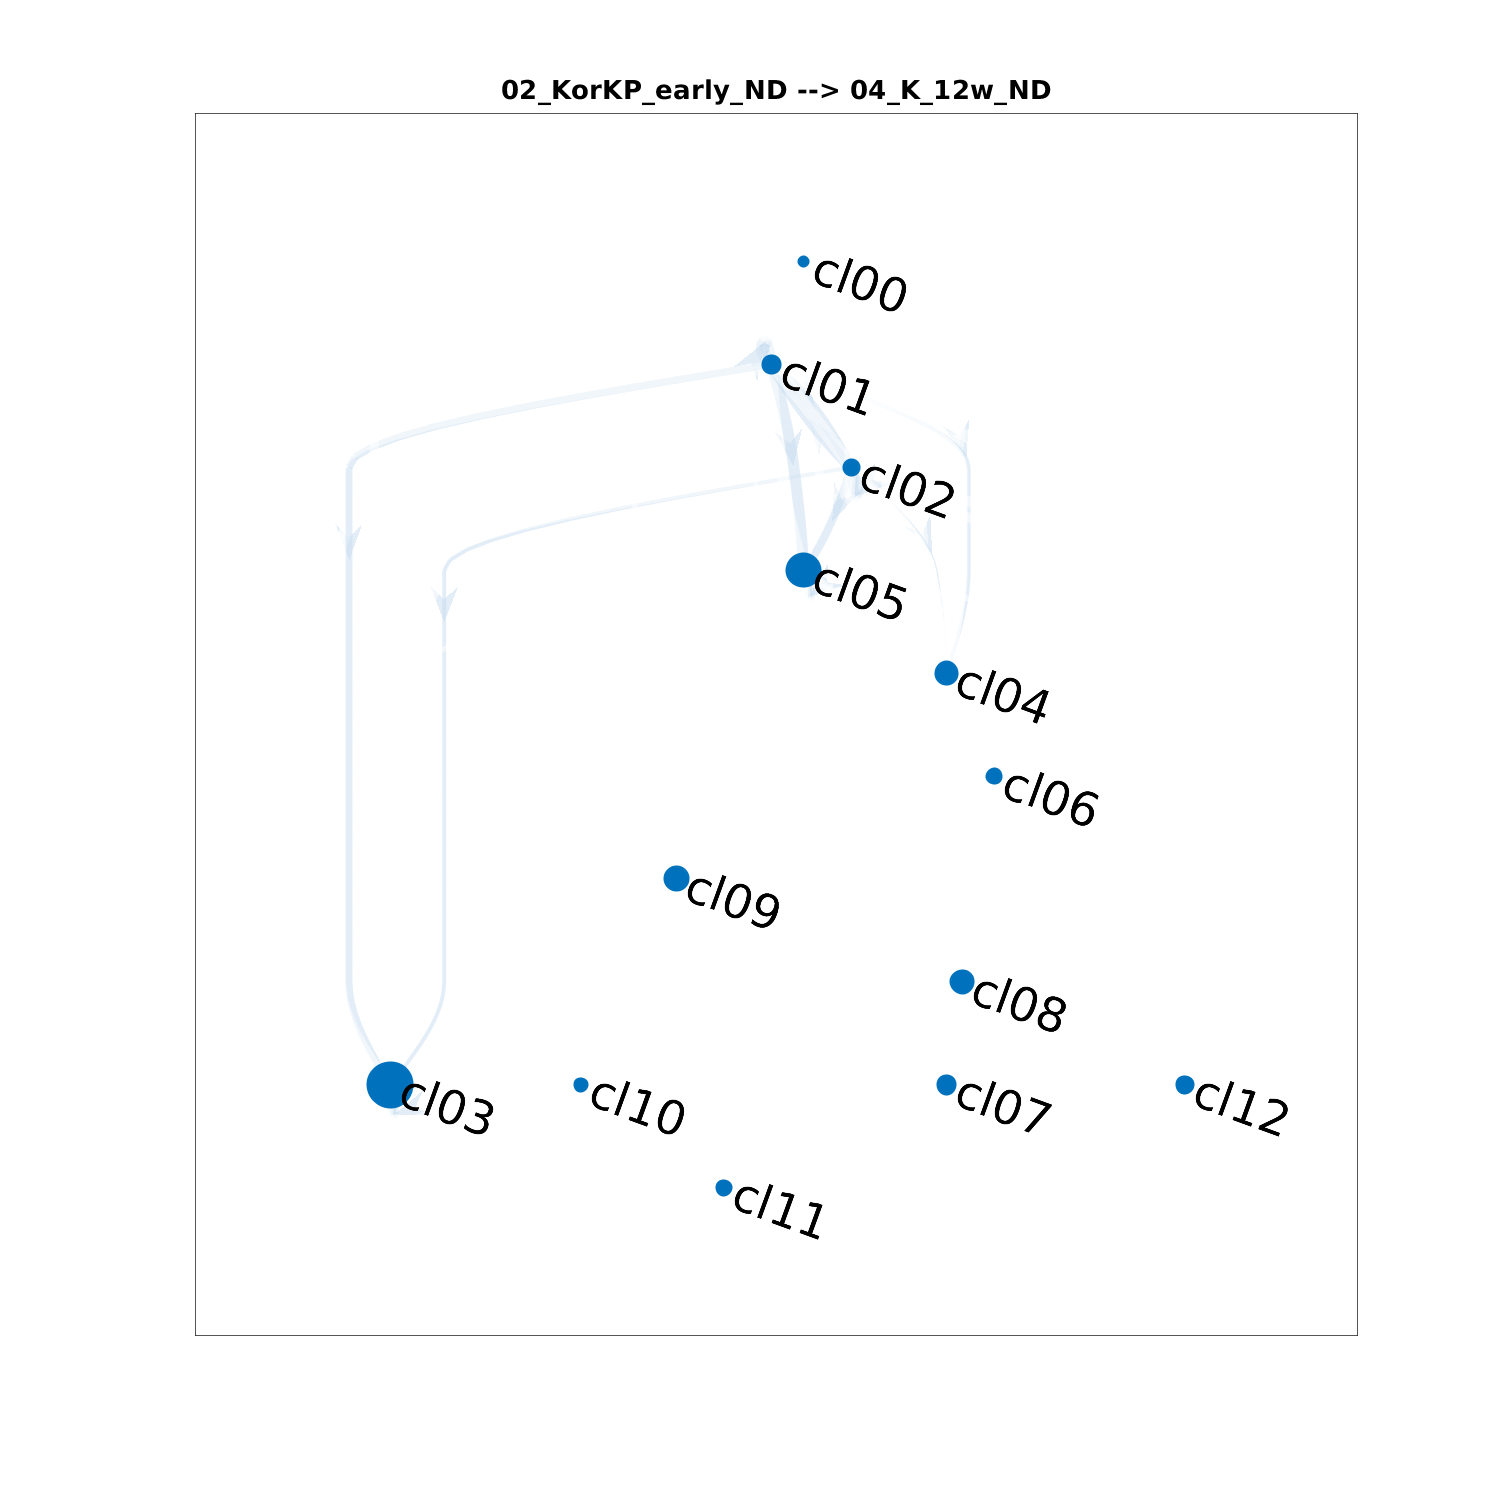

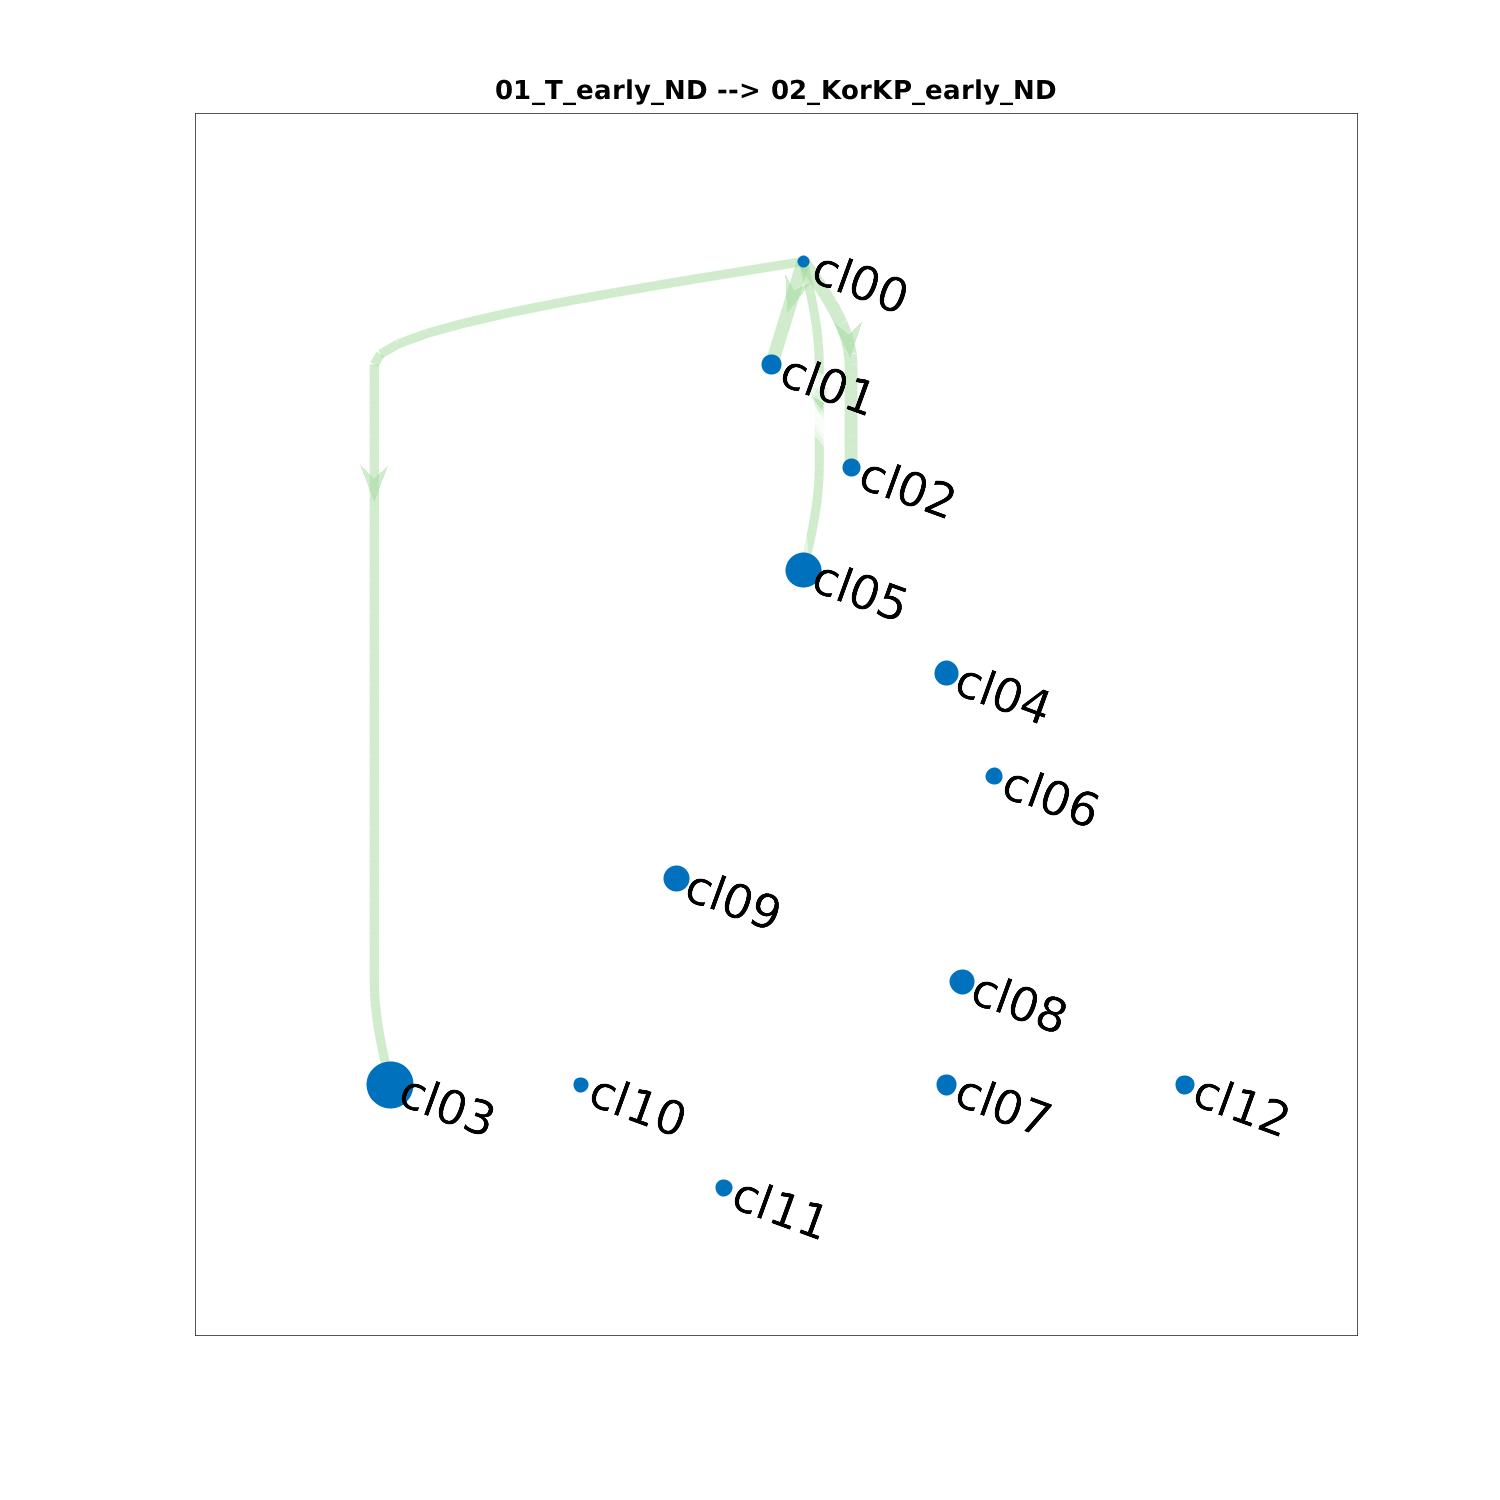

In [7]:
% plot -s 2000,1200
%% 

for zi = 1:6

    zG = digraph(struct2table(zEtry));

    %
    figure('Position',[20 20 1220 1220]);
    p = plot(zG,'layout','layered');


    zS = zG.Edges.Weight;
    [zX,zFx,zSout] = ecdfQuantile(zS);

    p.LineWidth = zSout*10;

    zTT = zG.Edges.TT;
    
    cmapFull_mono = cmapFull_TN;
    cmapFull_mono(:) = 1;
    cmapFull_mono(zi,:) = cmapFull_TN(zi,:);

    p.EdgeColor = cmapFull_mono(zTT,:);

    % 
    zImp = zG.Edges.Weight;

    wbc = centrality(zG,'pagerank','importance',zImp);


    zV = round(wbc*150)+4;
    p.MarkerSize = zV ;

    p.NodeFontSize = 24;
    p.ArrowSize = 14;

    title(sprintf('%s --> %s',zTestList{zi}{1},zTestList{zi}{2}),'Interpreter','none')

end


zClList =

  12x1 cell array

    {'cl01'}
    {'cl02'}
    {'cl03'}
    {'cl04'}
    {'cl05'}
    {'cl06'}
    {'cl07'}
    {'cl08'}
    {'cl09'}
    {'cl10'}
    {'cl11'}
    {'cl12'}



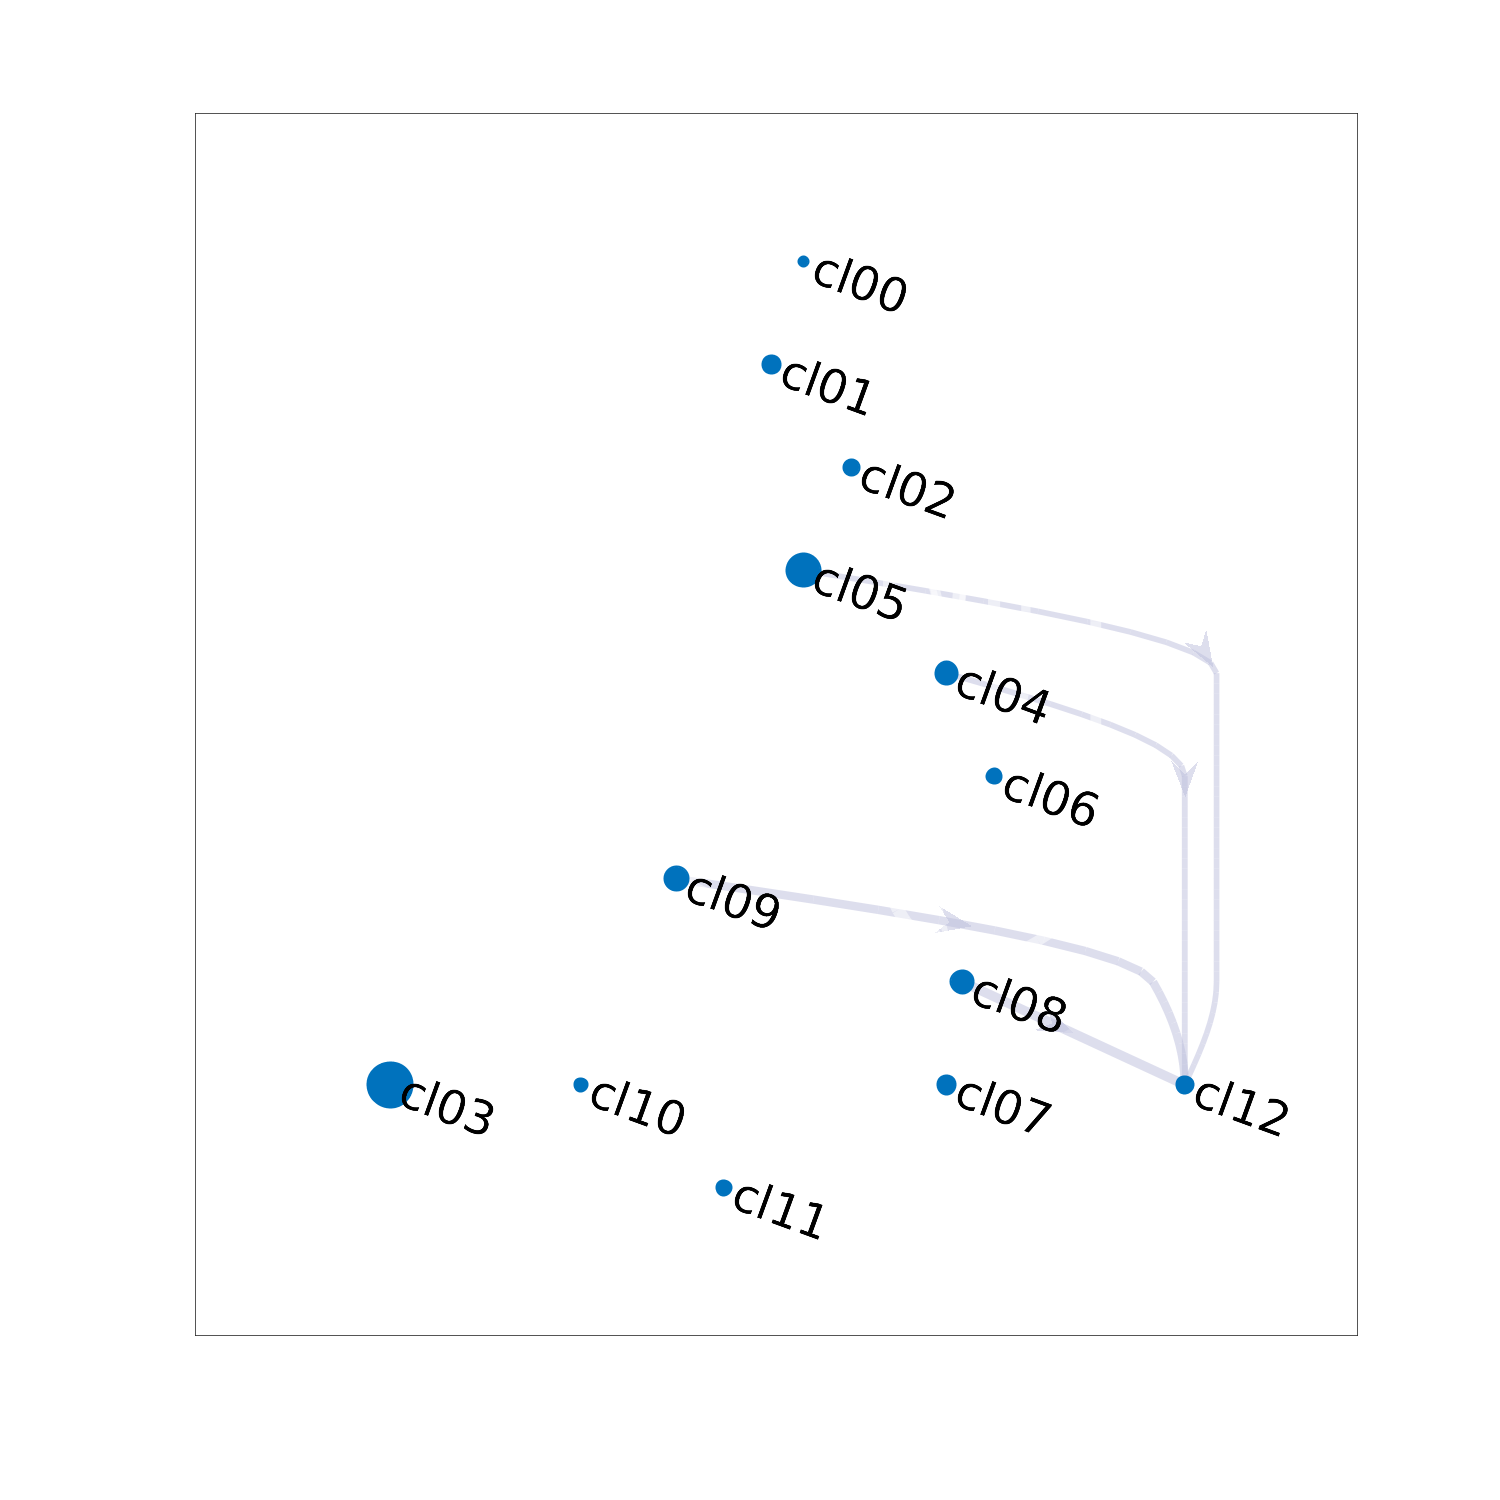

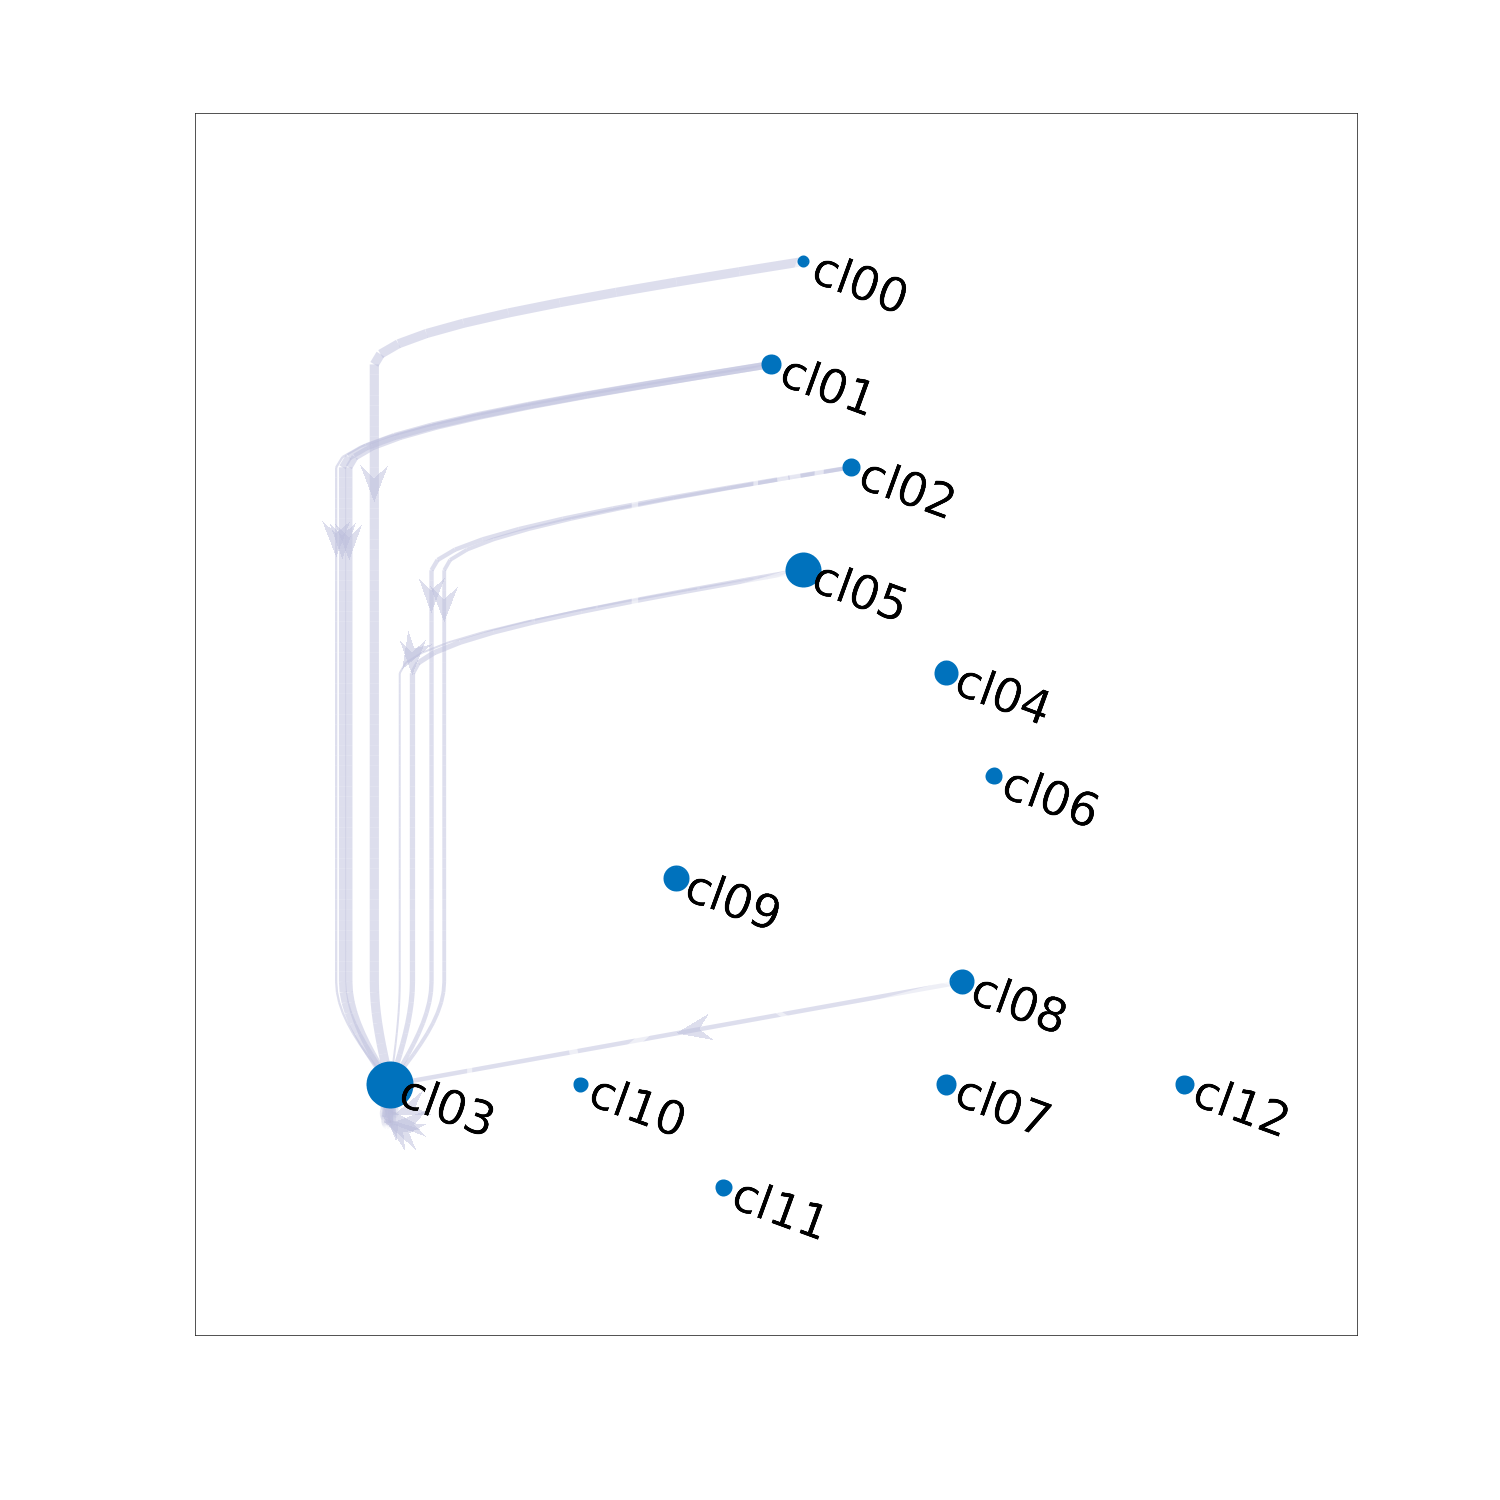

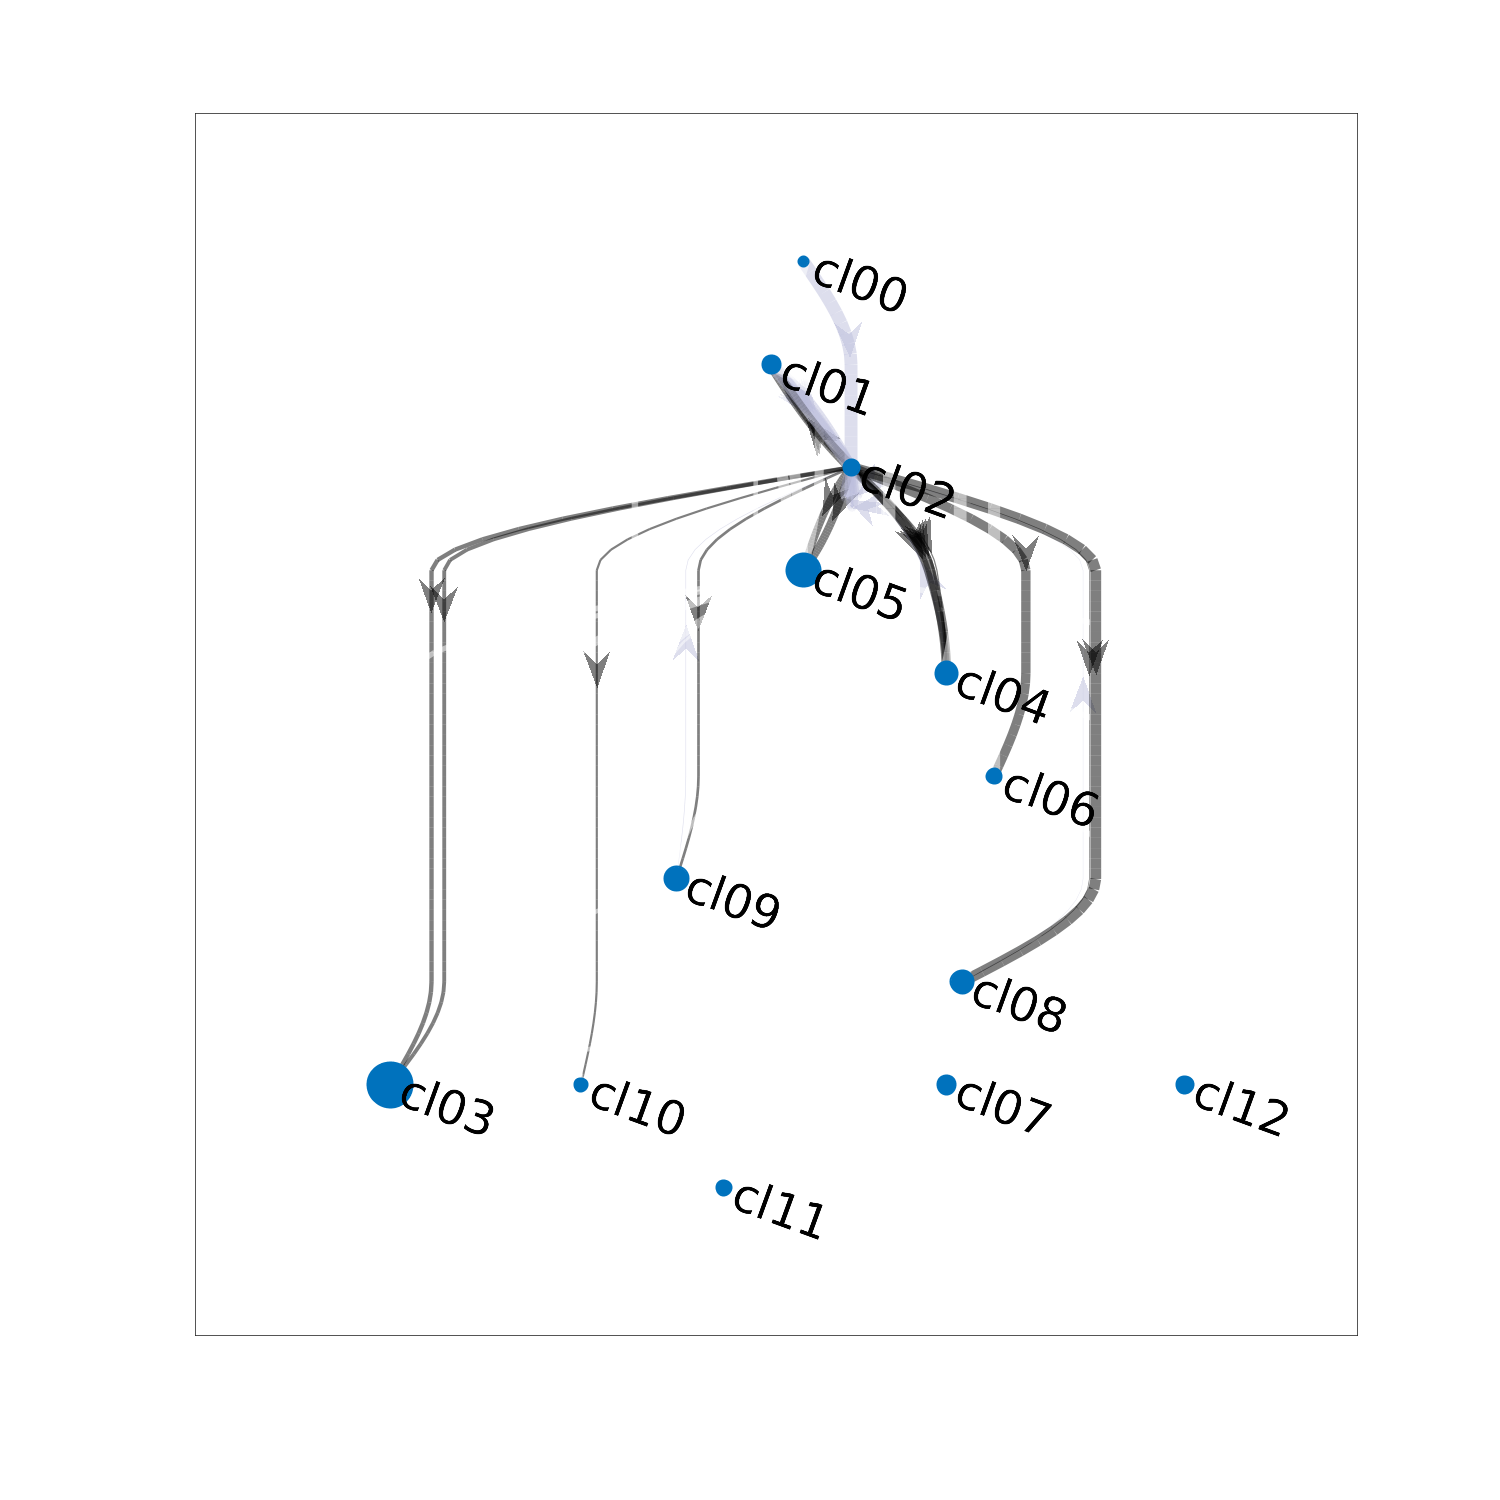

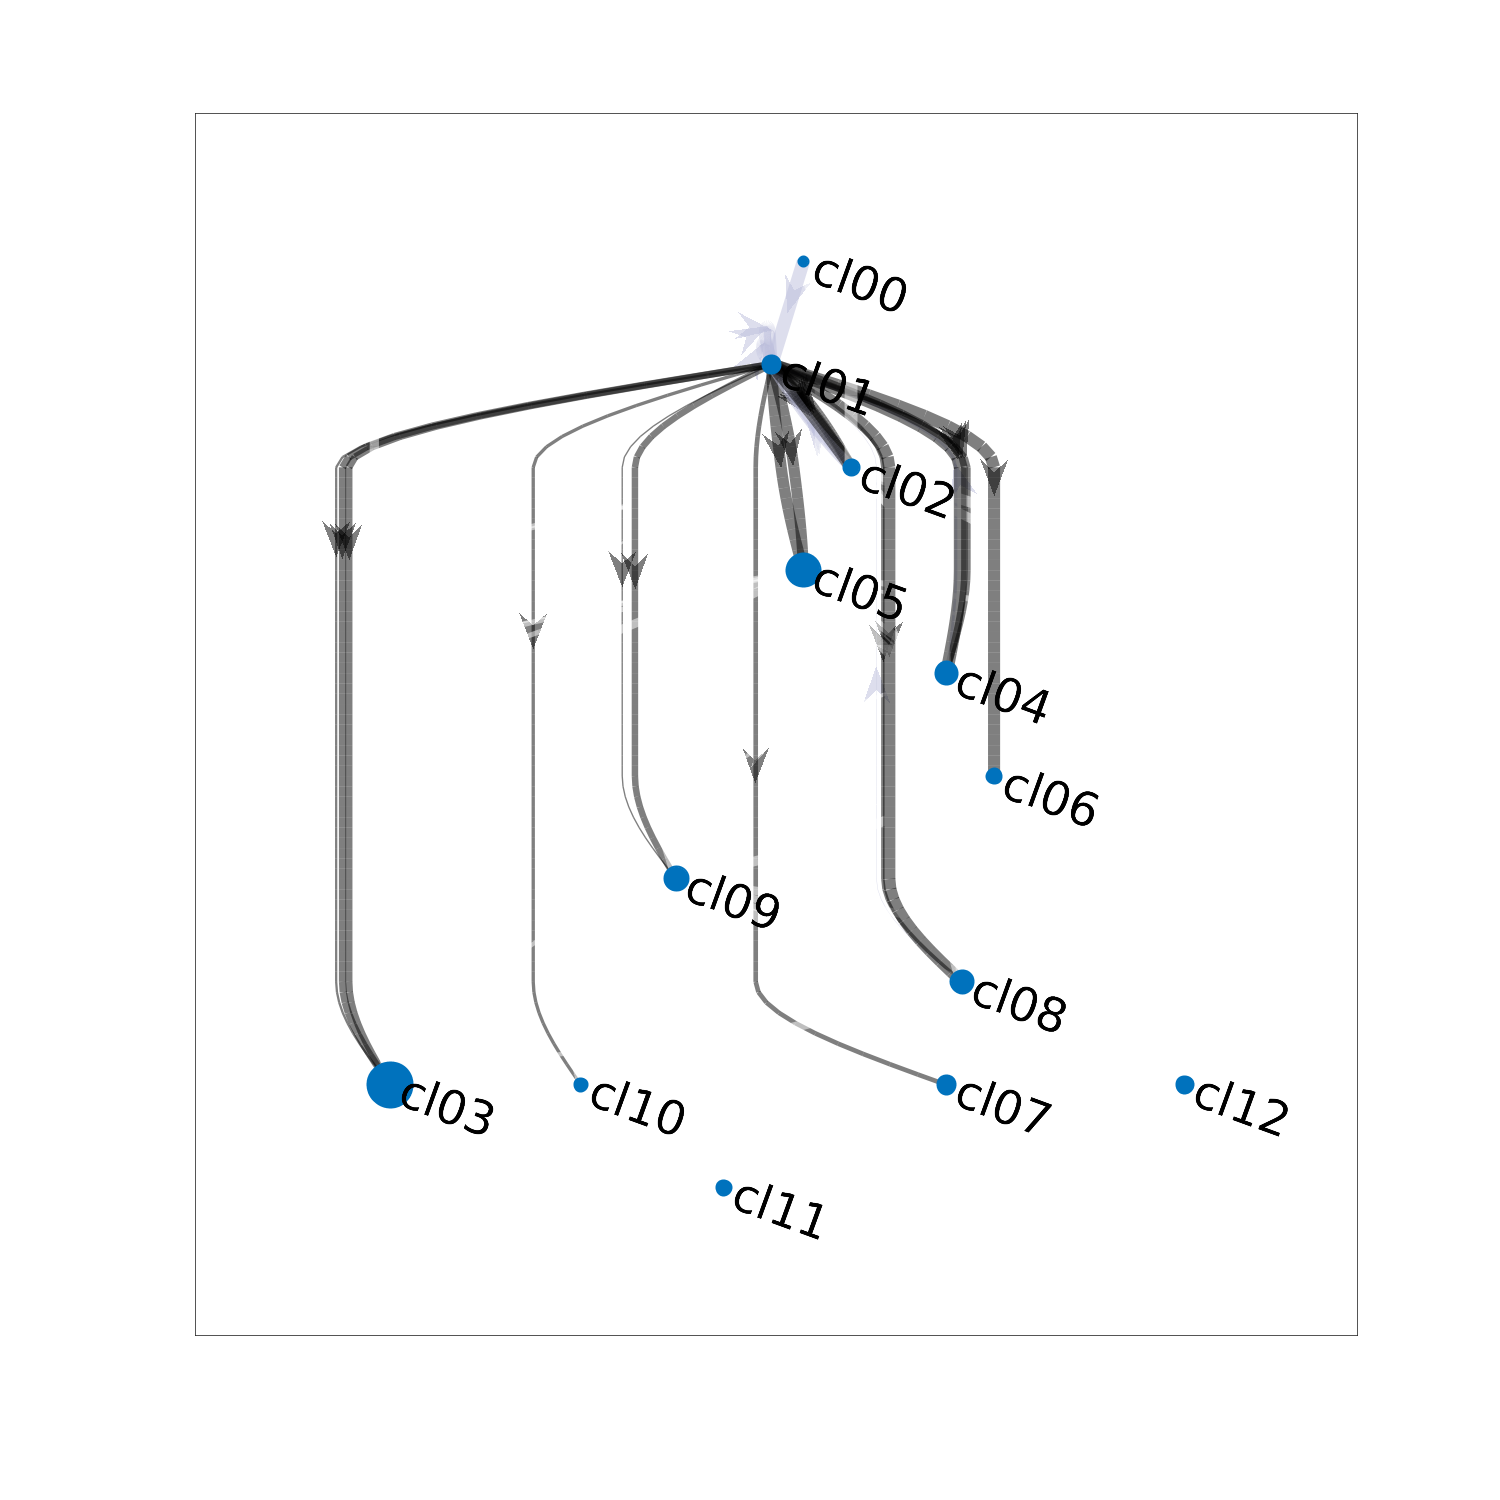

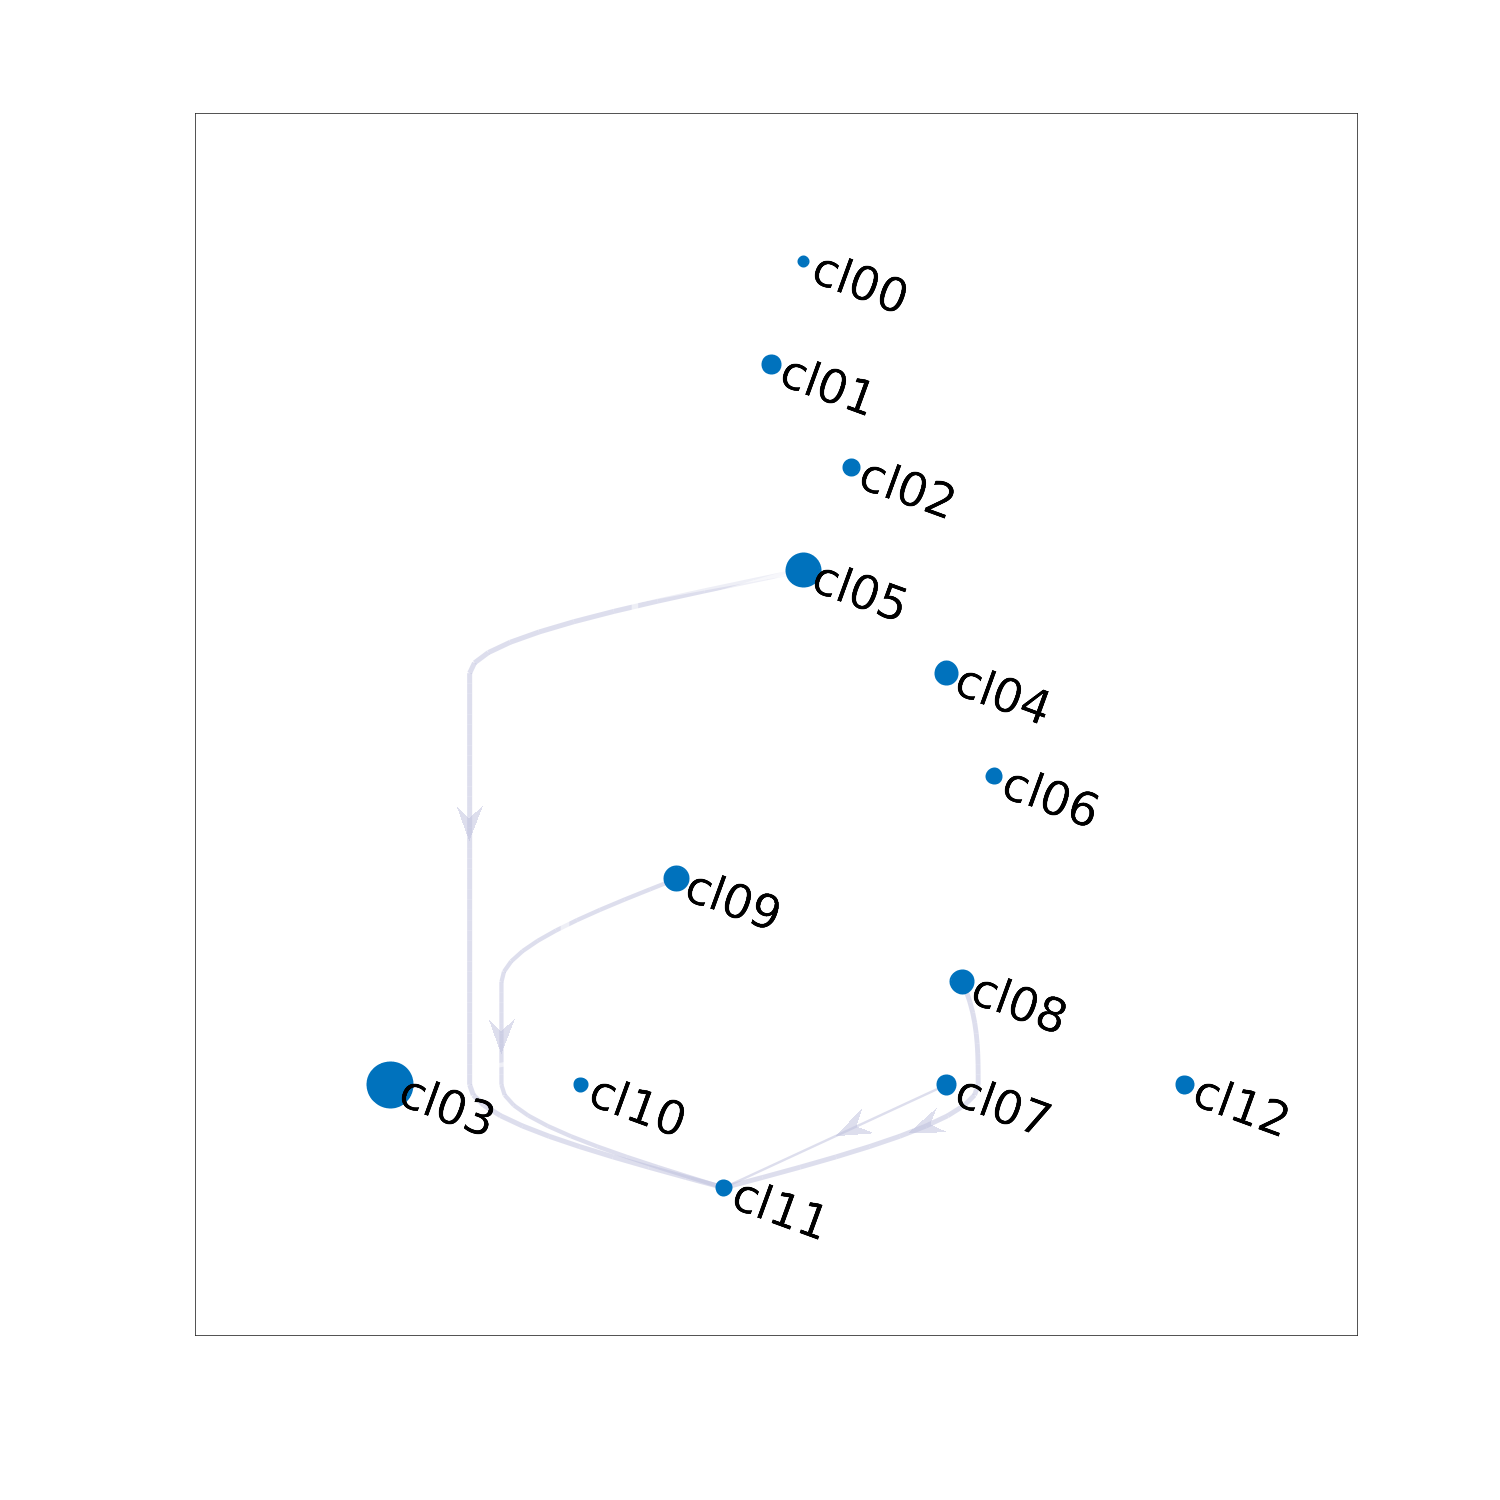

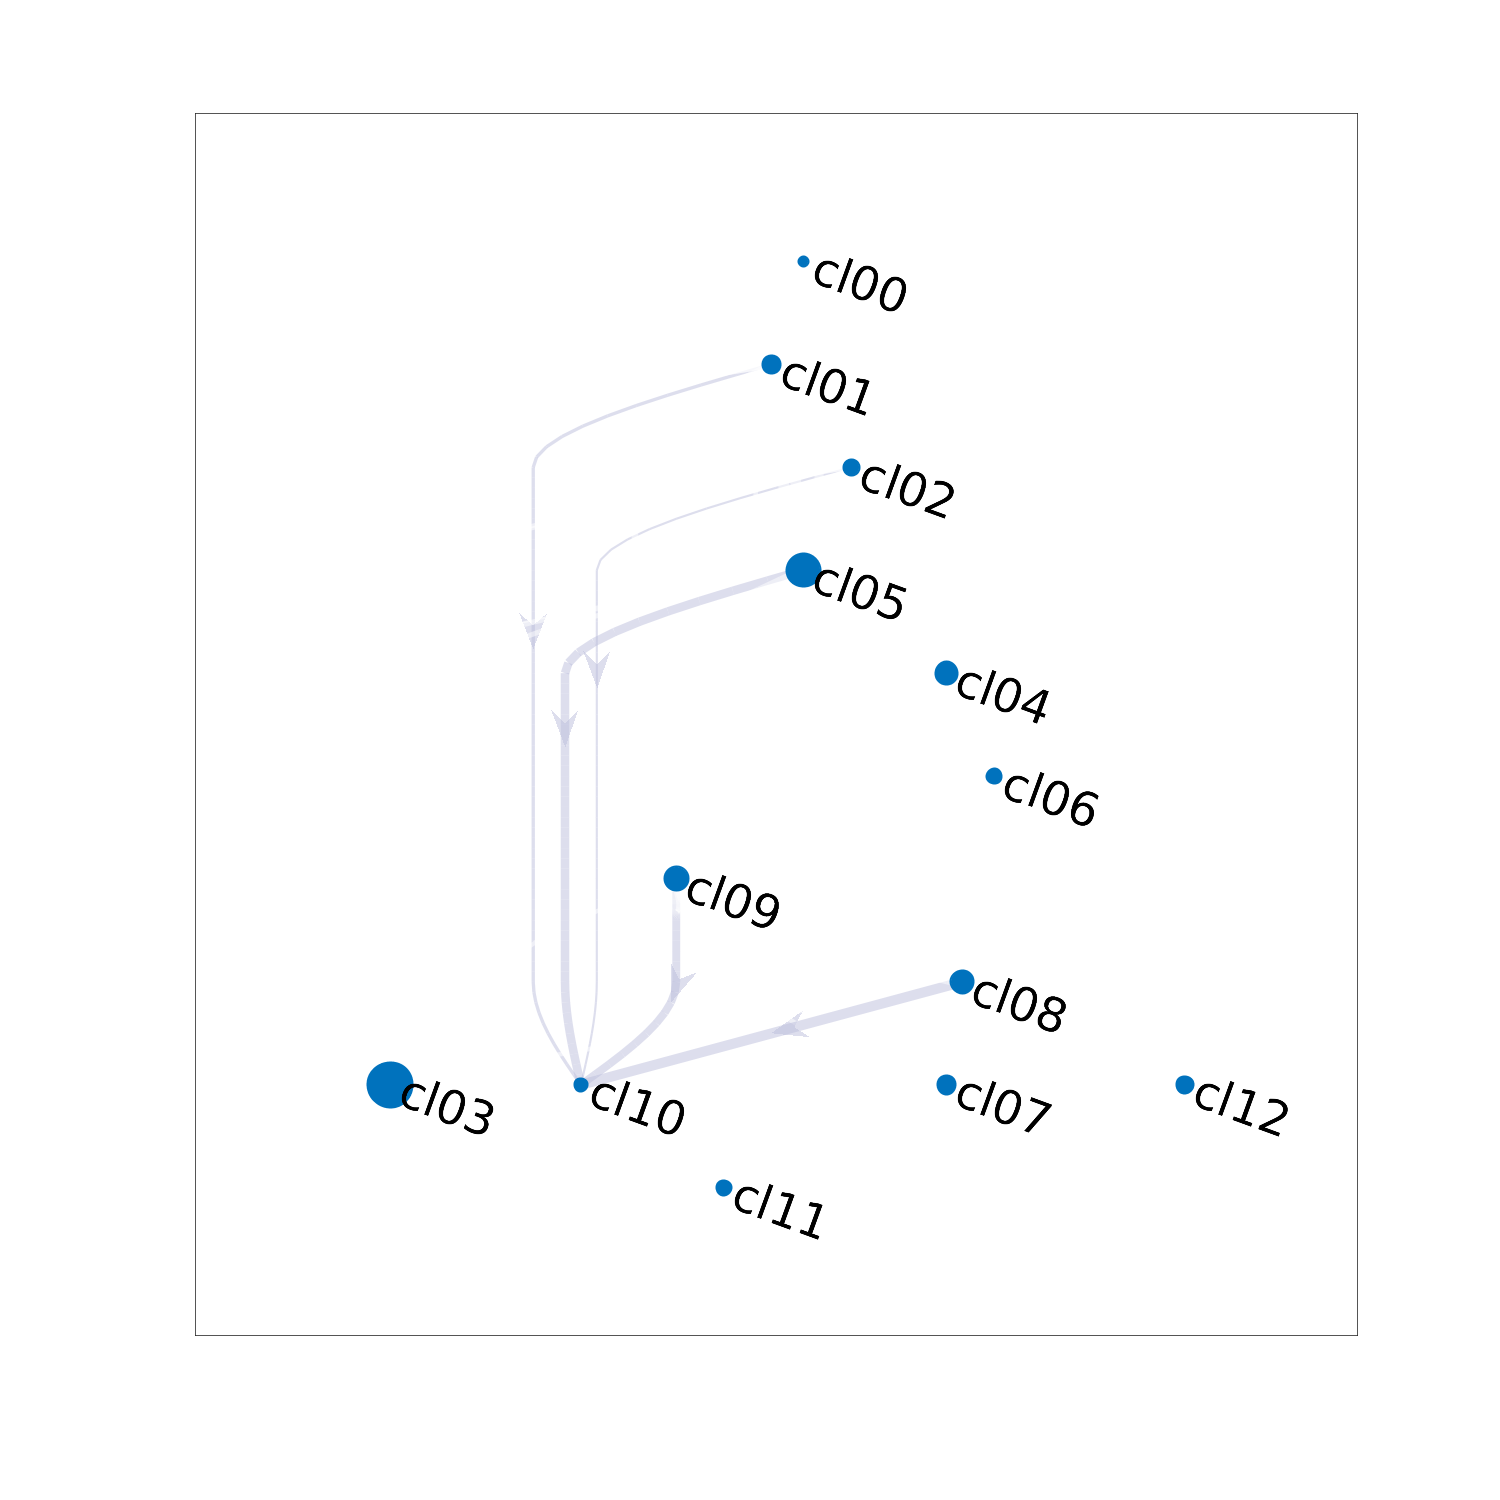

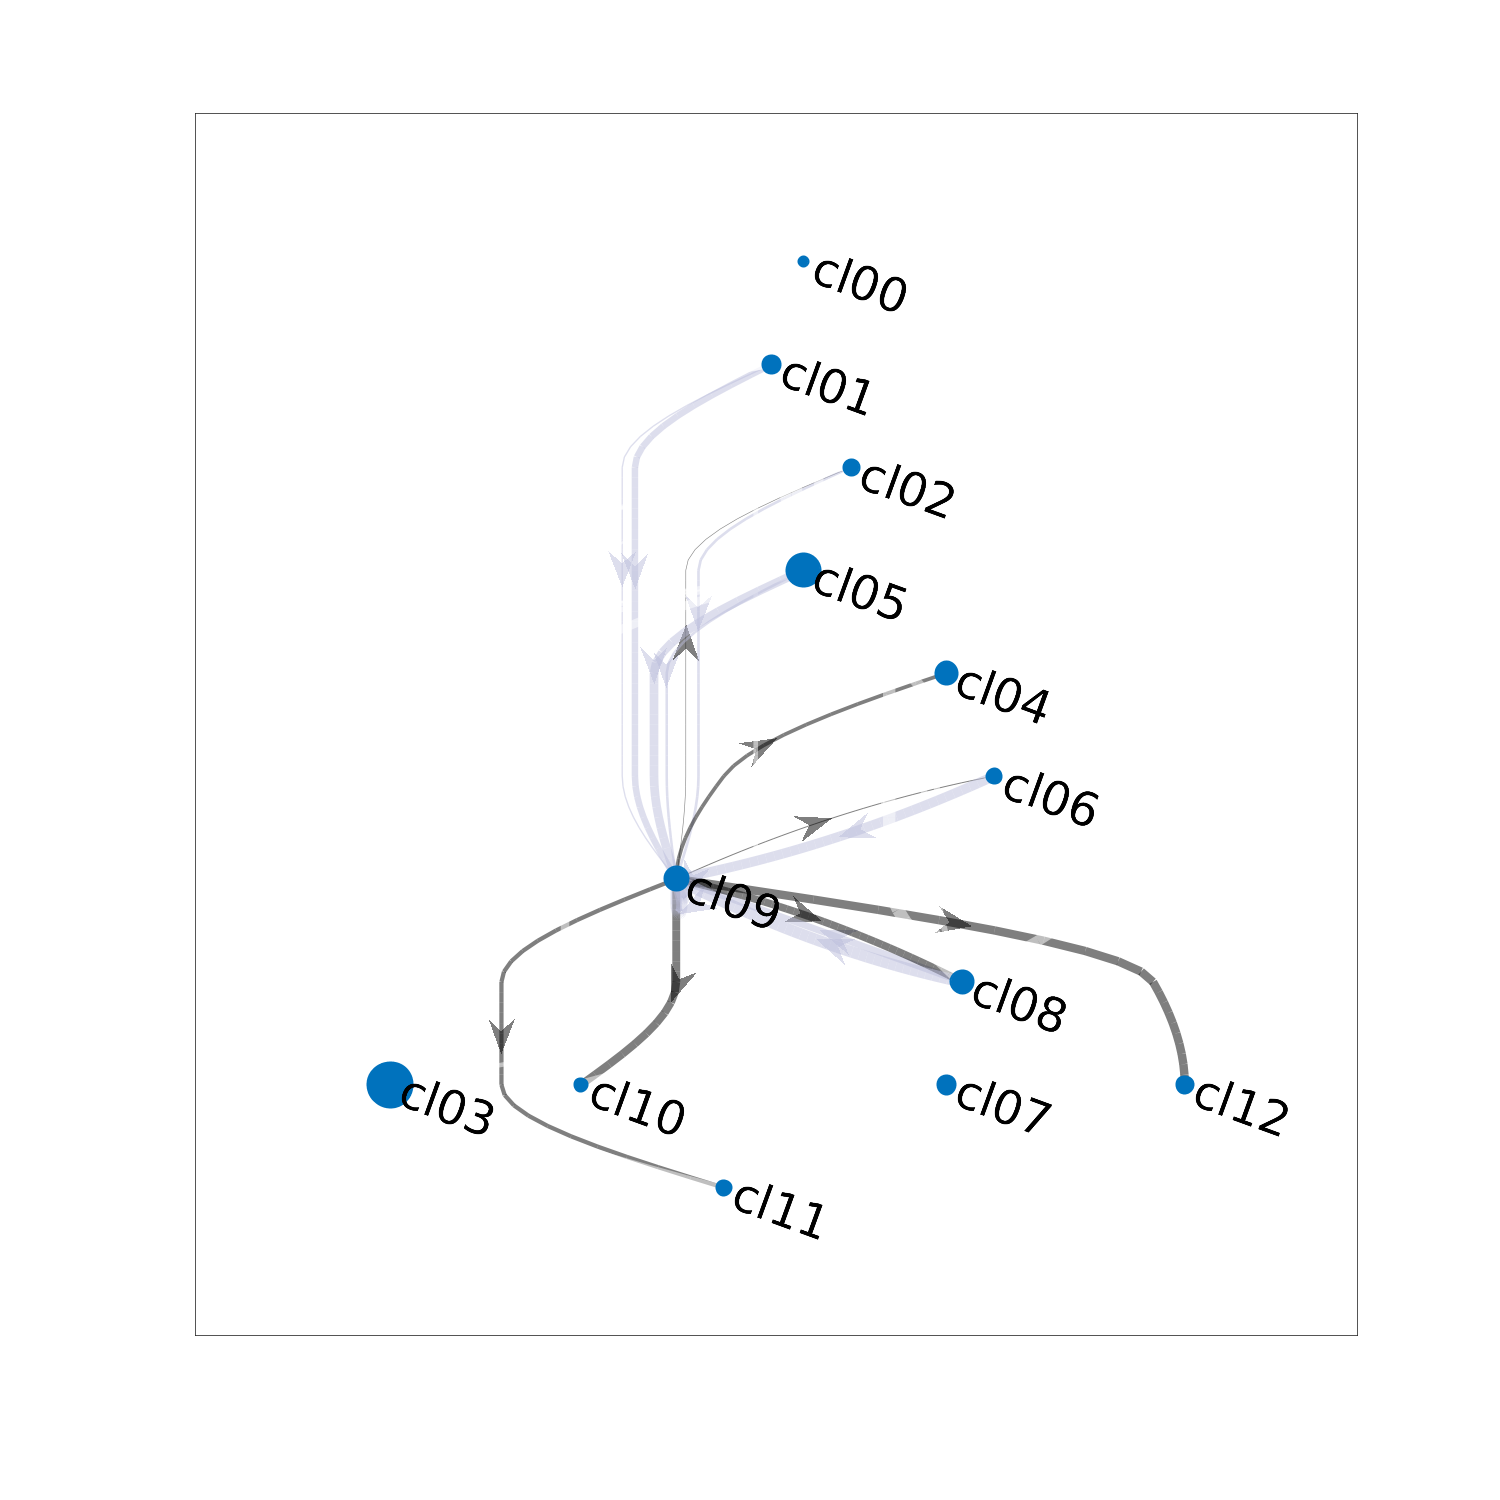

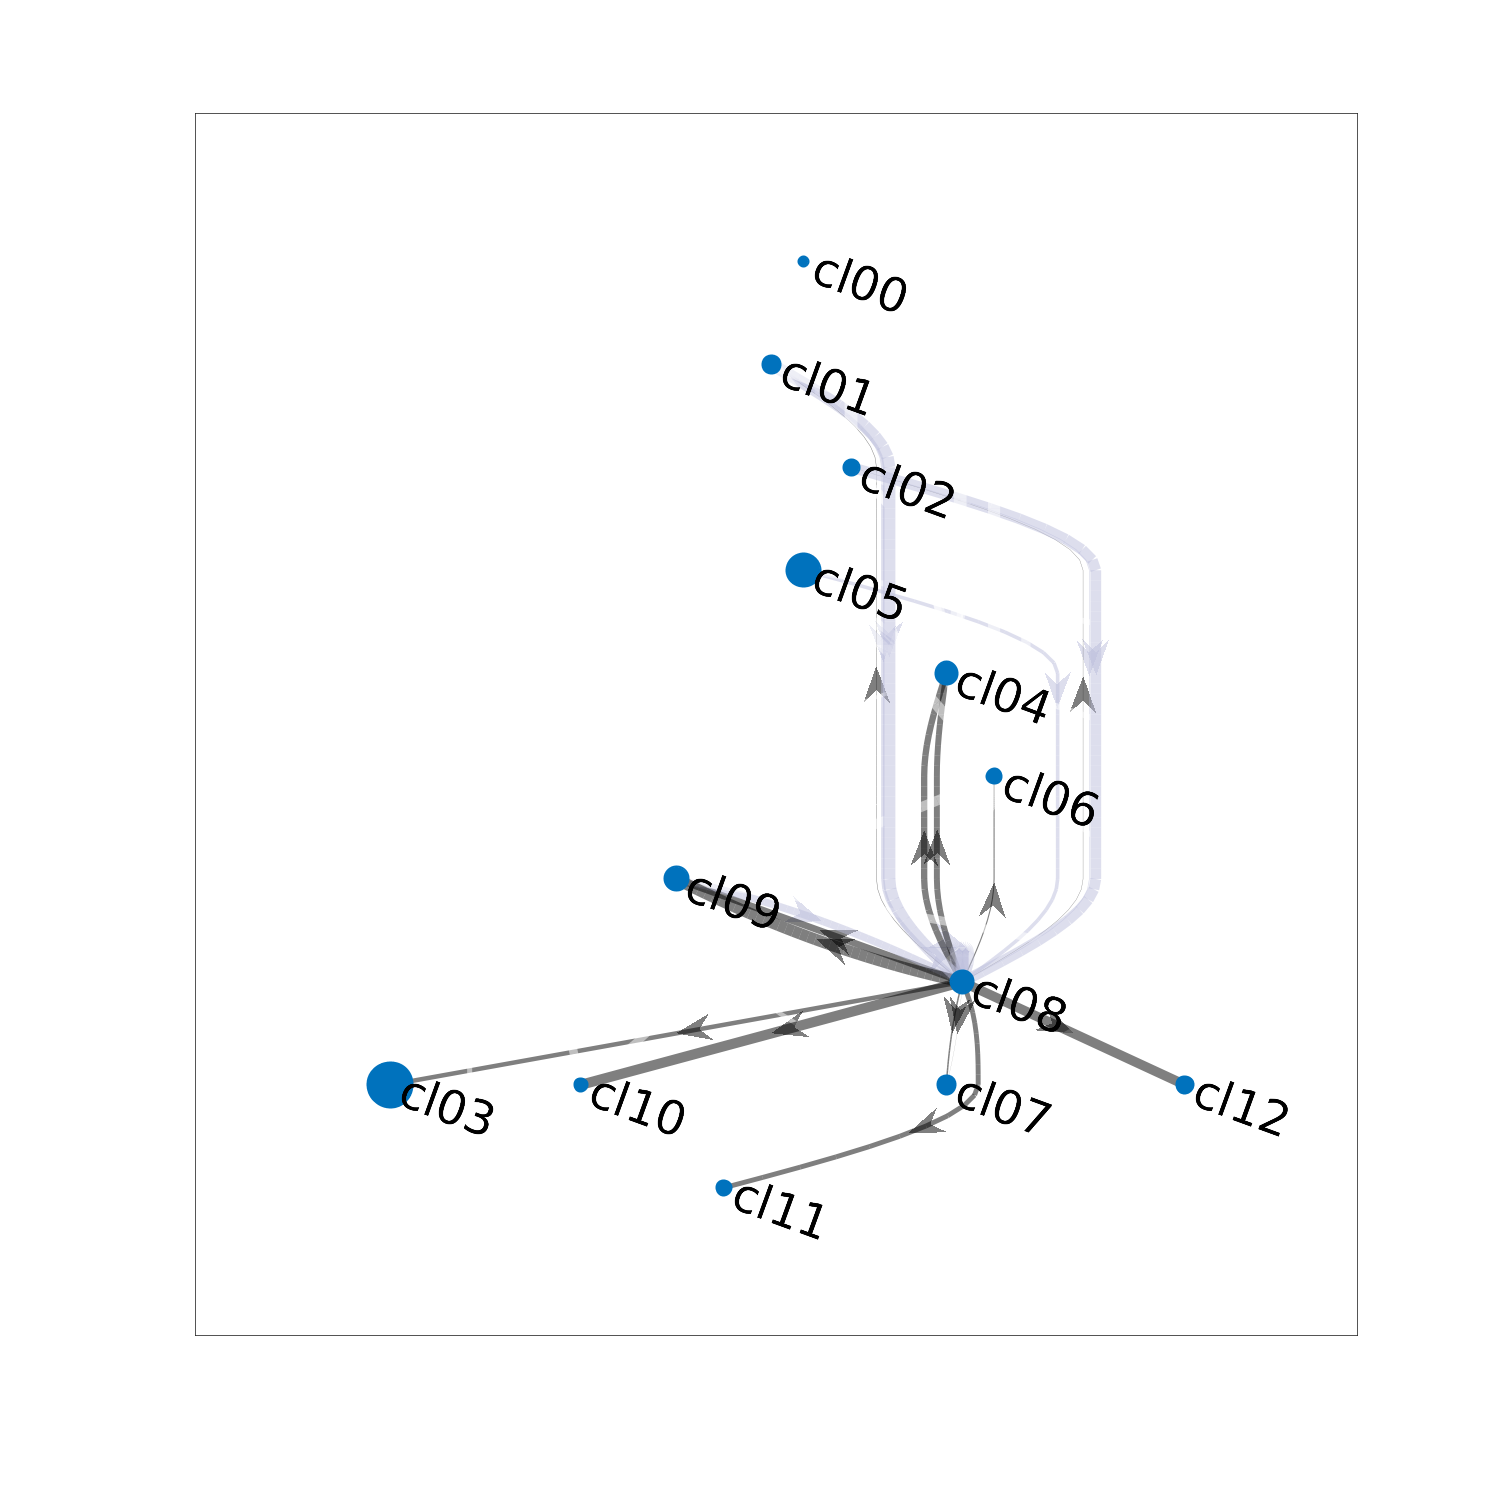

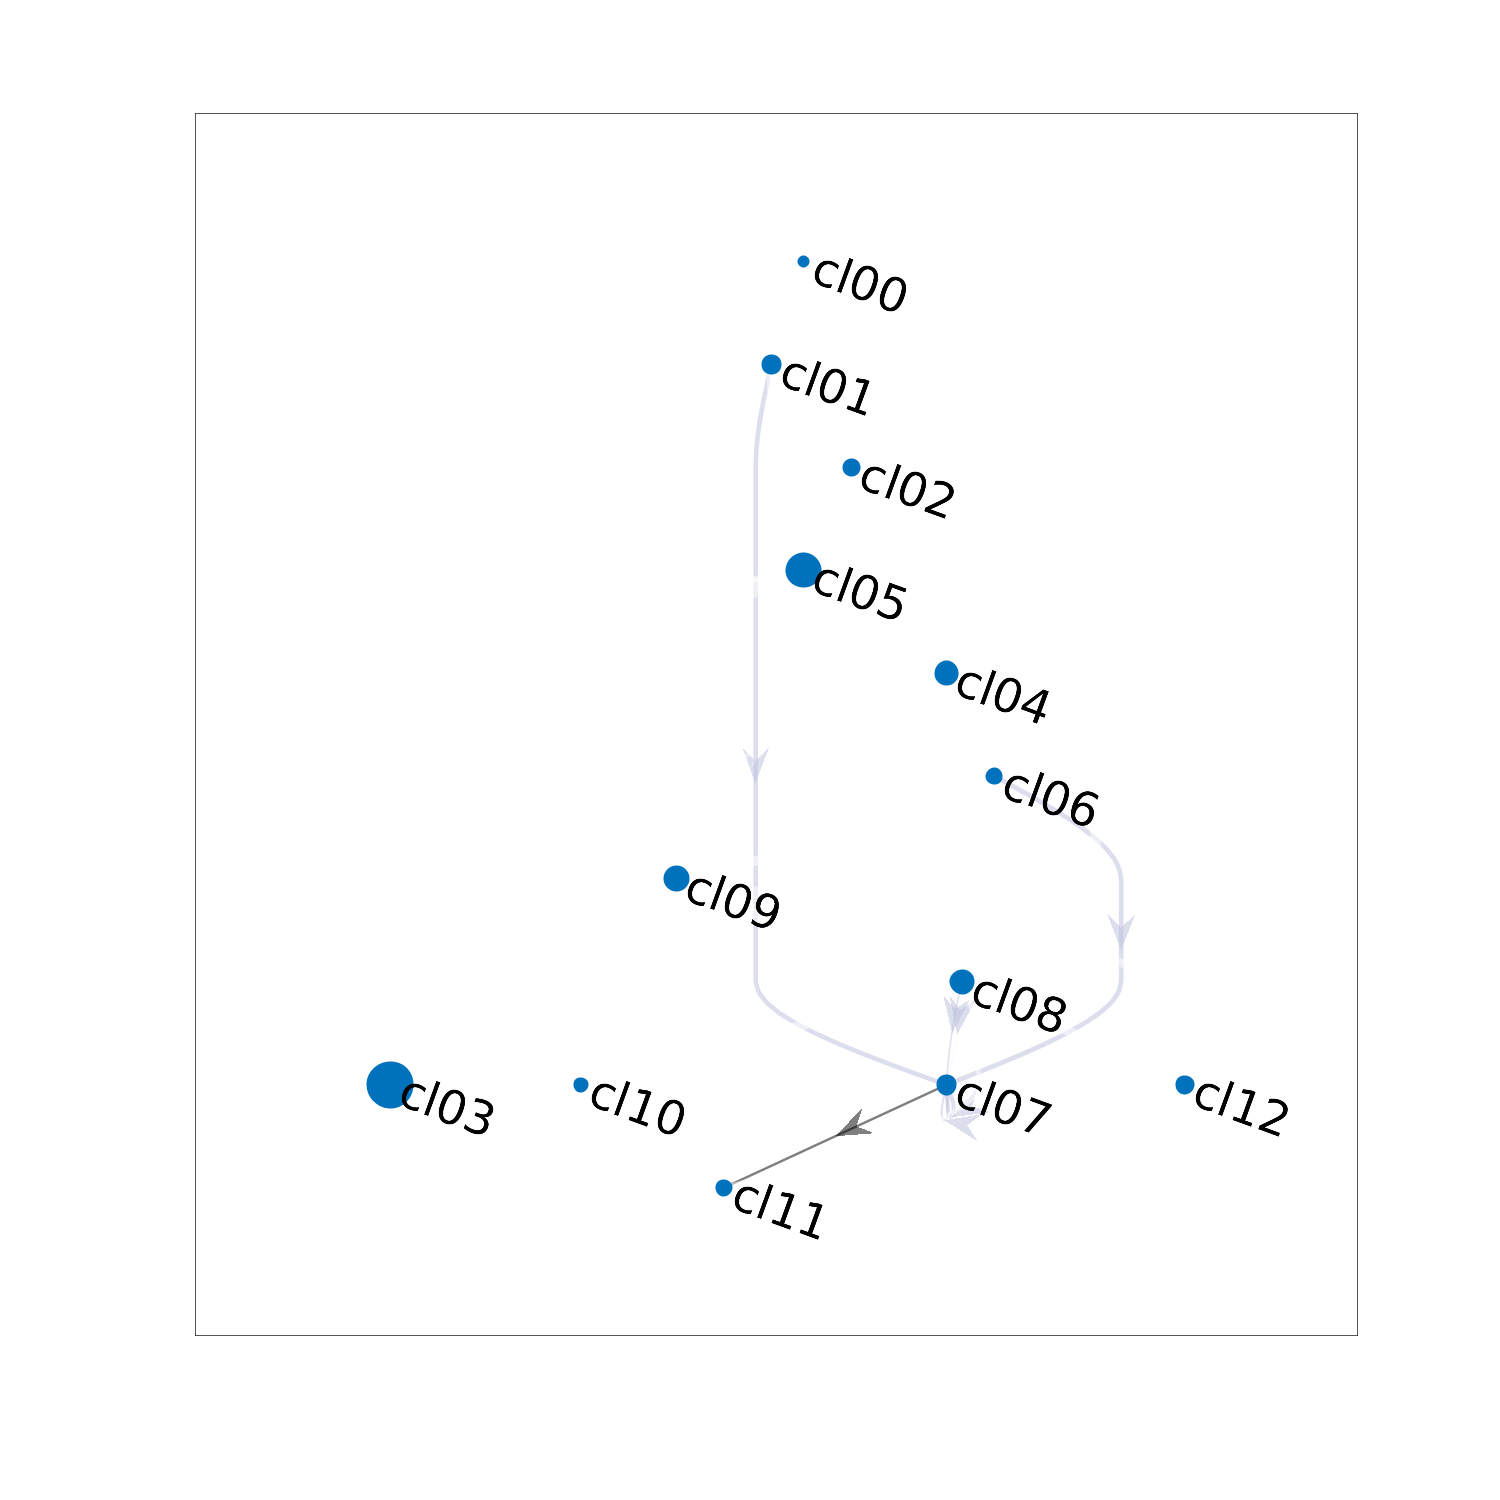

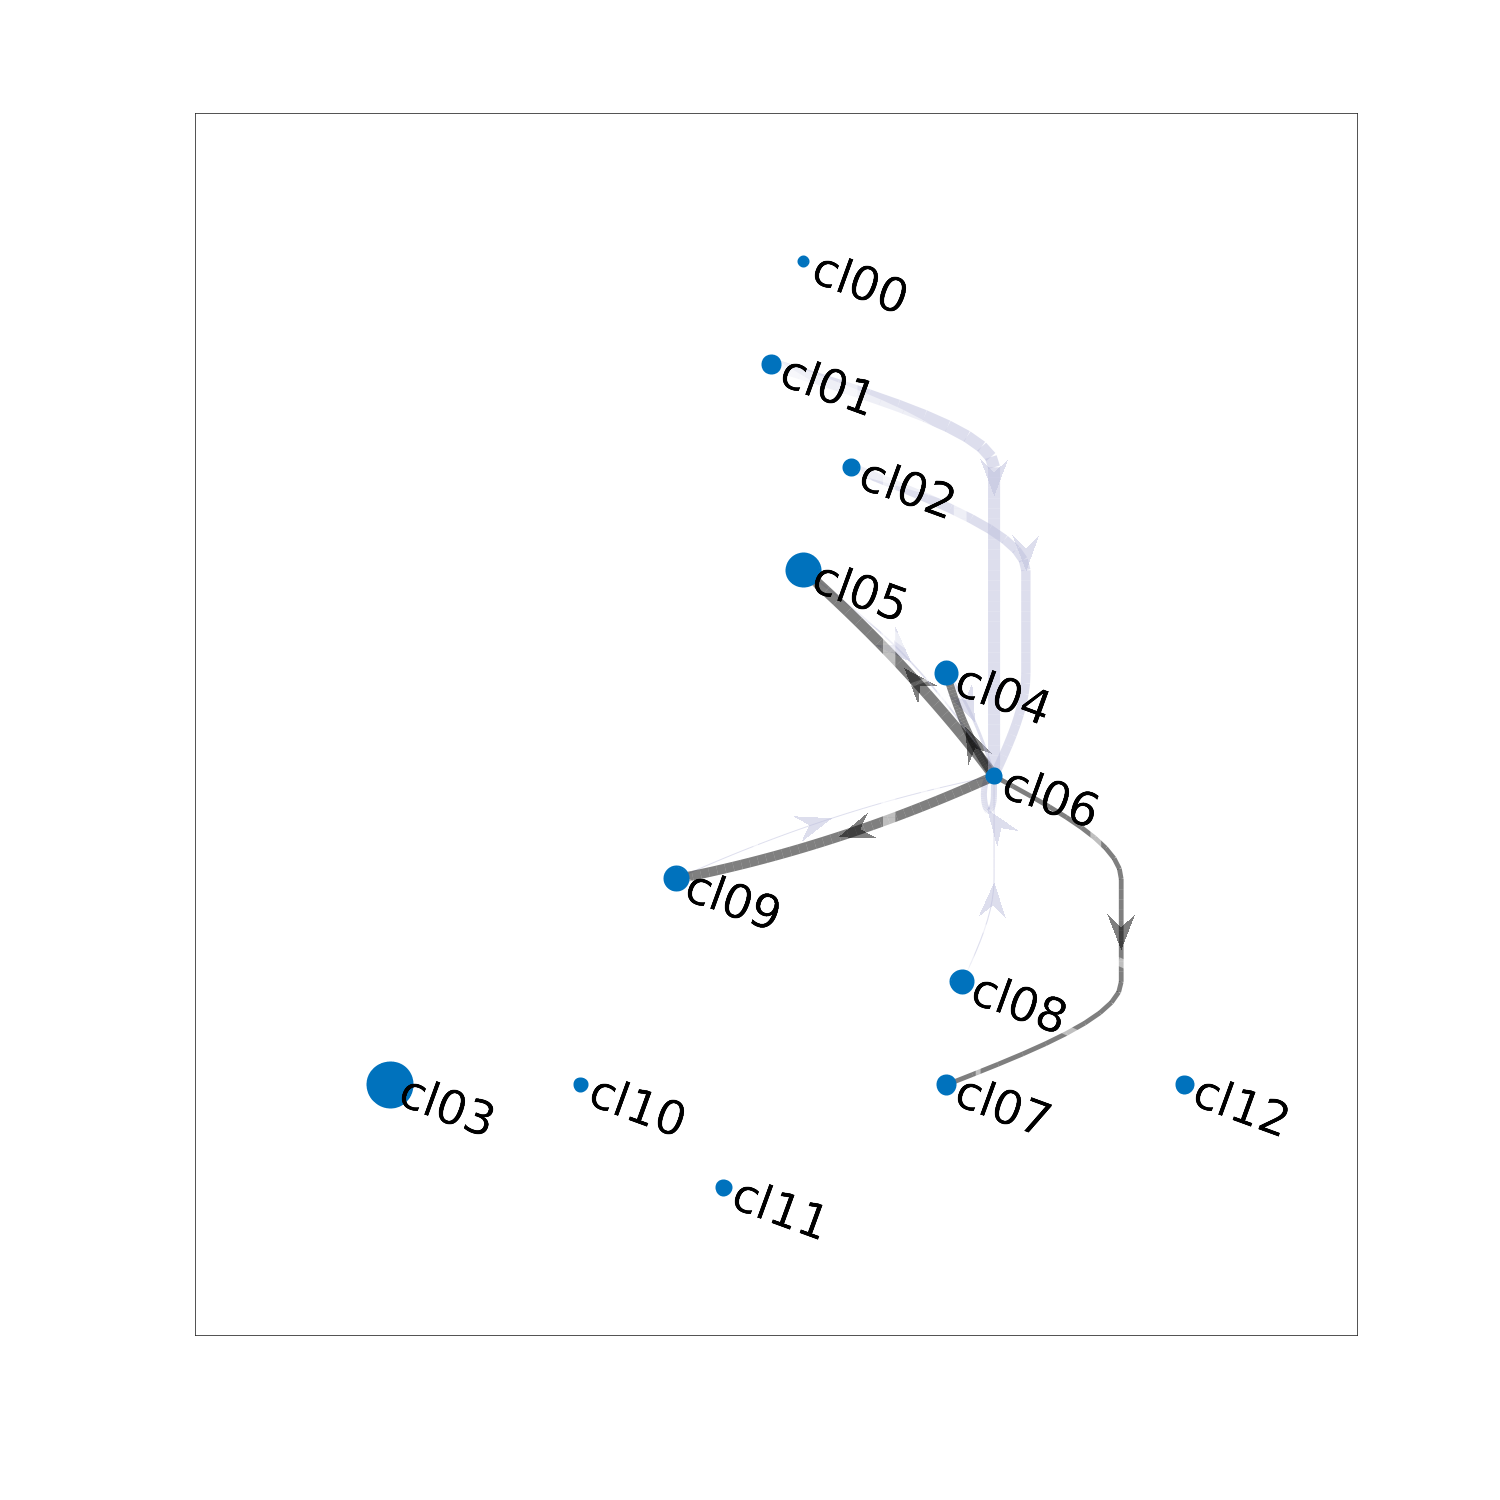

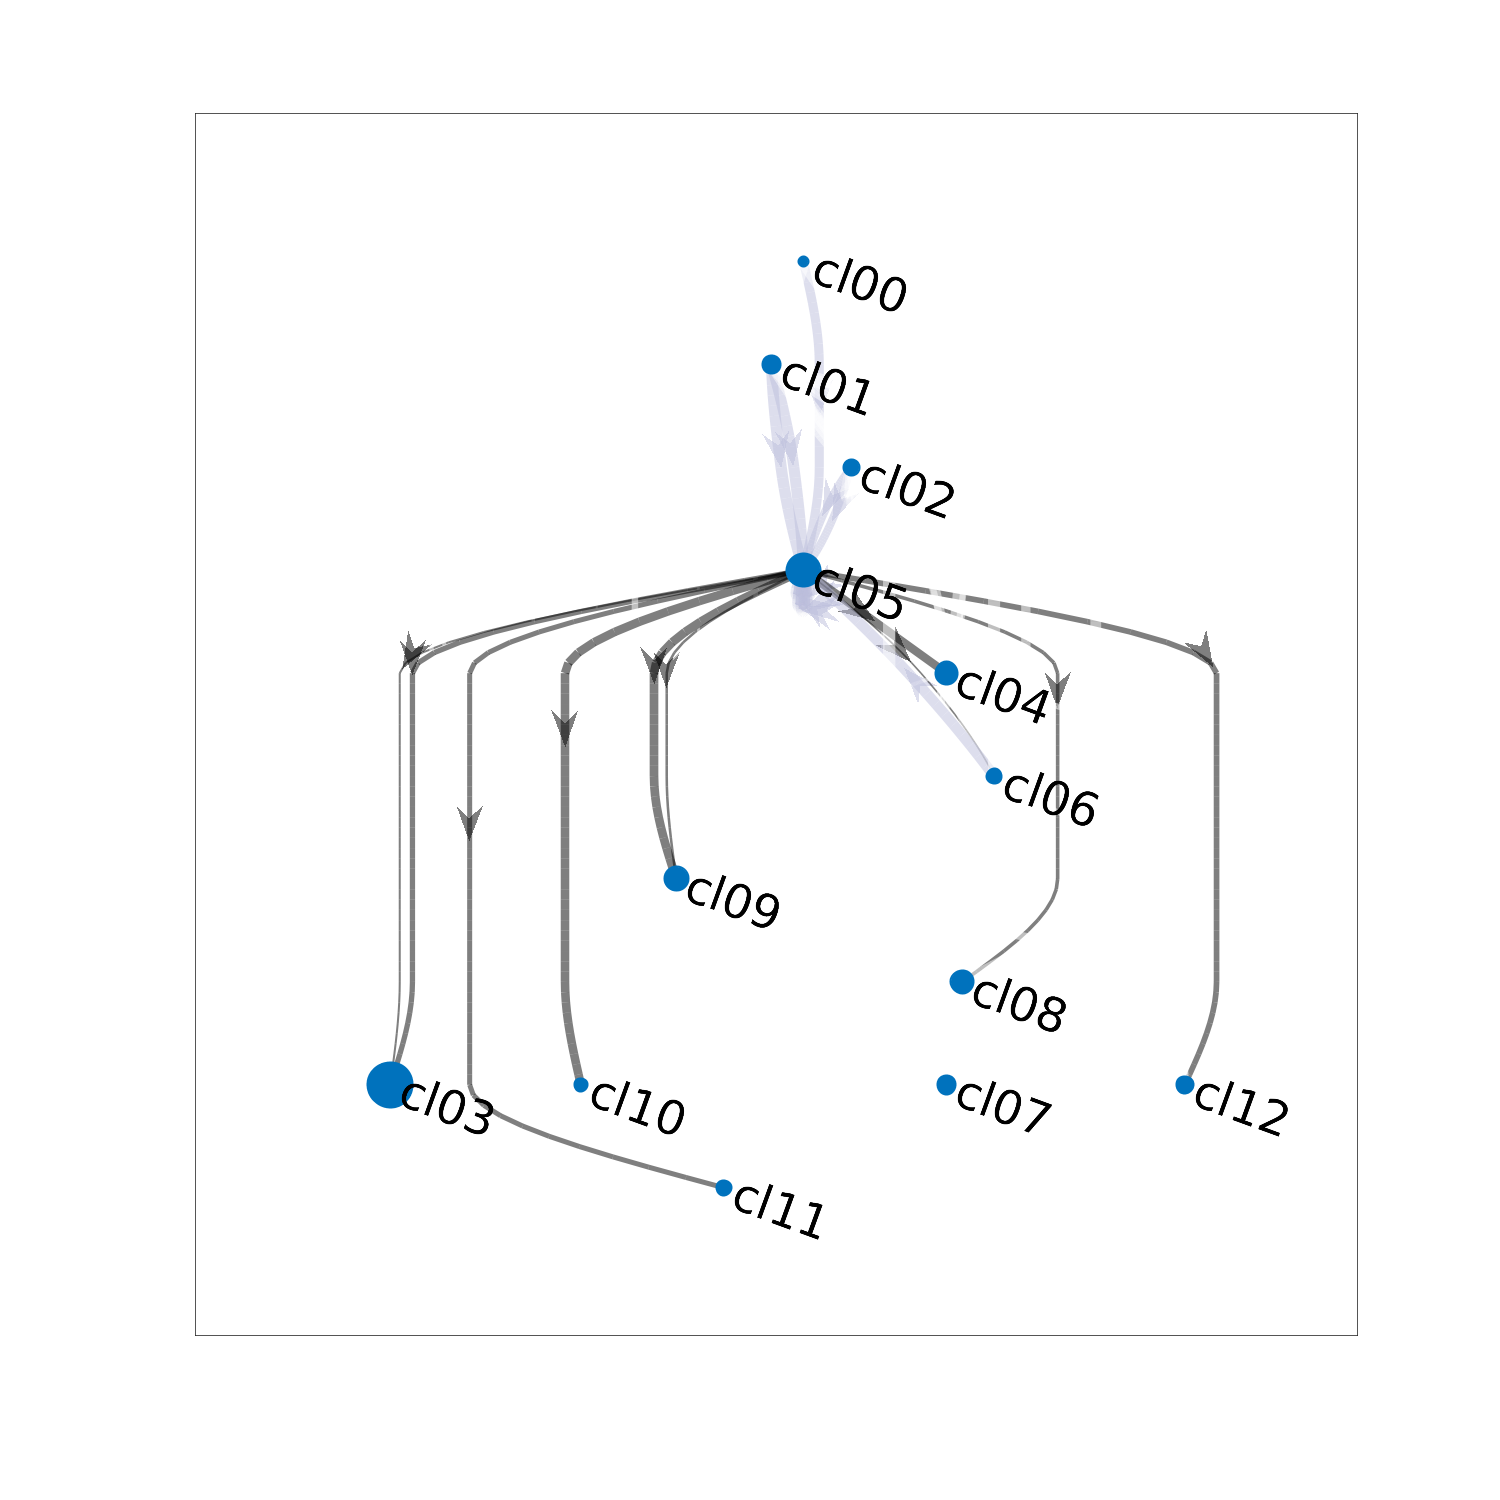

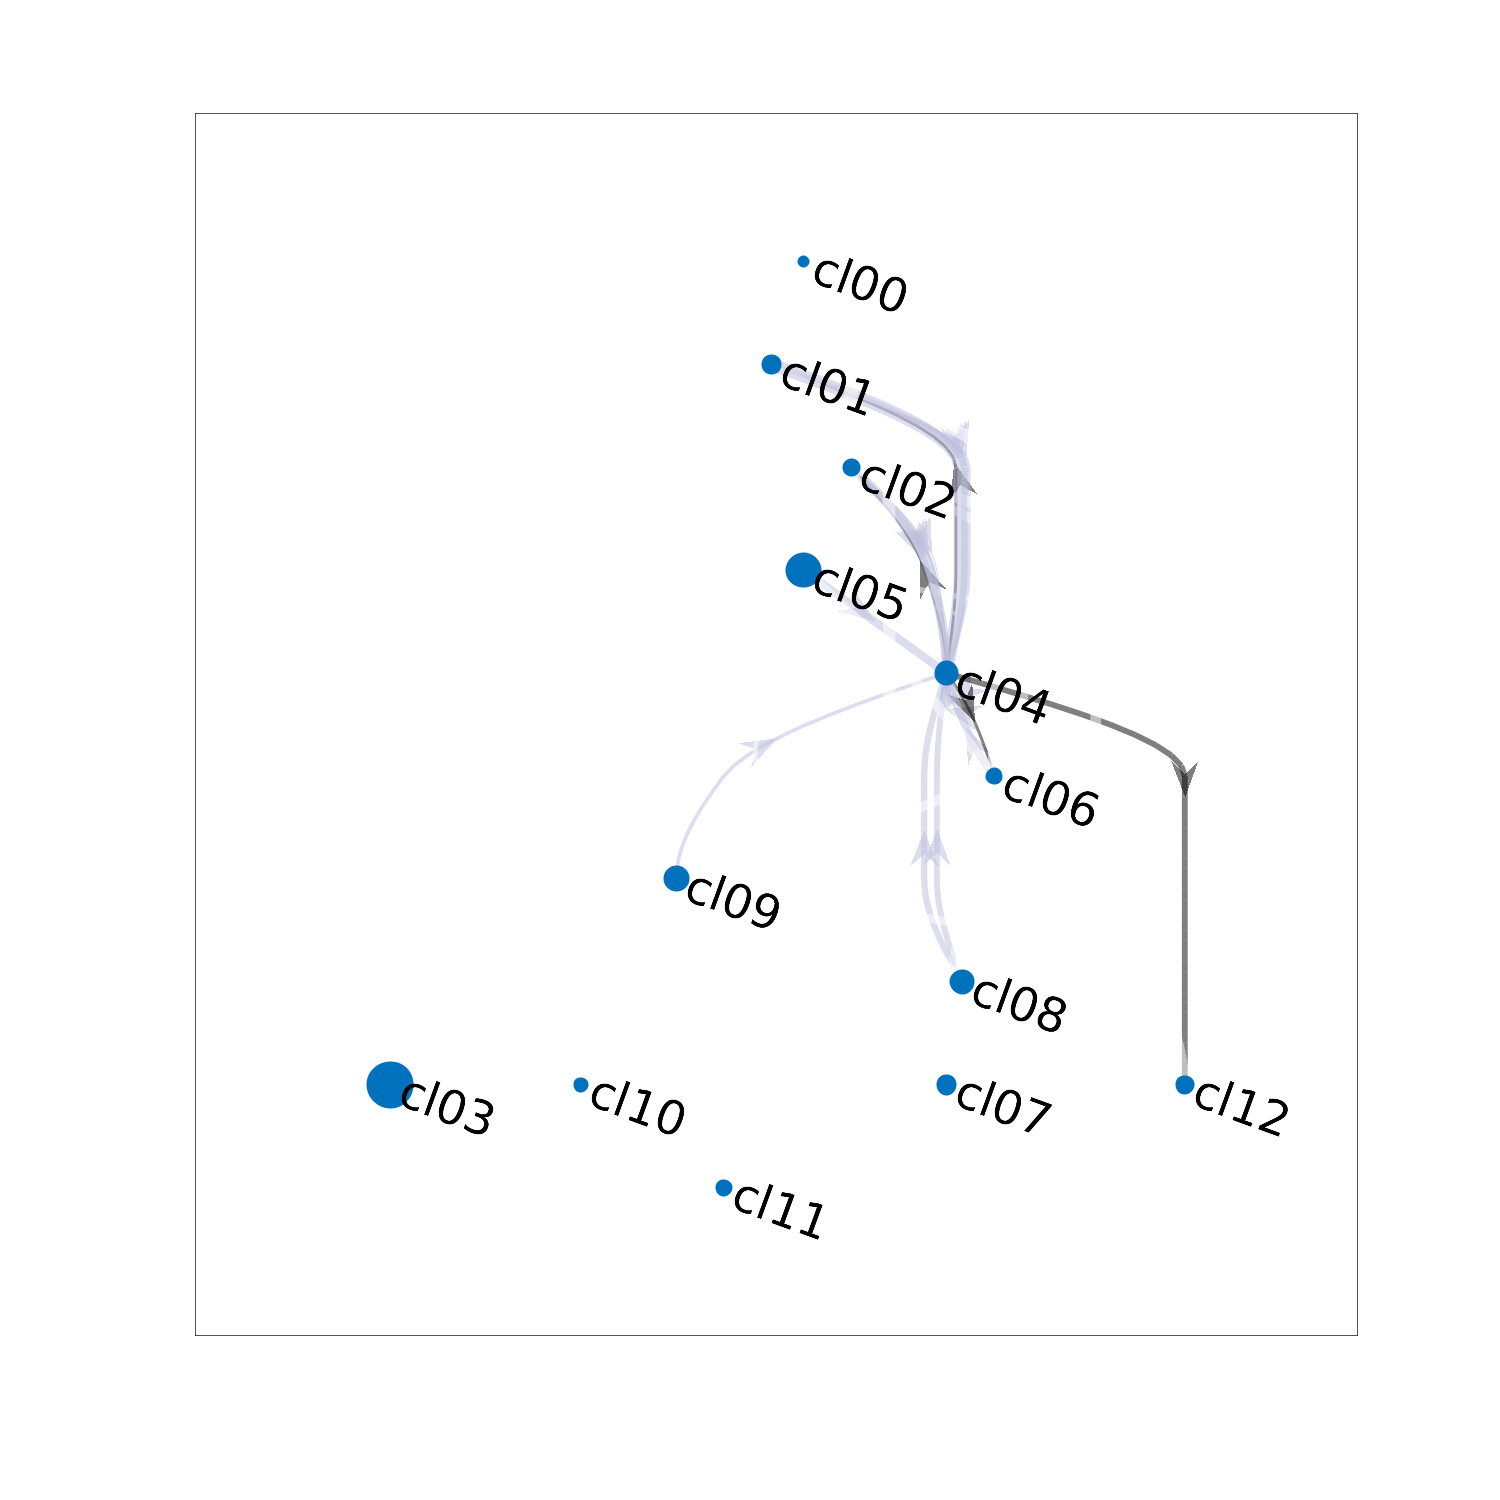

In [8]:
%%
zClList = unique(zTarget)

for zi = 1:12
%%
    digraph(struct2table(zEtry));
    %
    figure('Position',[20 20 1220 1220]);
    p = plot(zG,'layout','layered');

    zS = zG.Edges.Weight;
    [zX,zFx,zSout] = ecdfQuantile(zS);

    p.LineWidth = zSout*10;

    
    %%
    zEsel = strcmp(zG.Edges.EndNodes(:,1),zClList{zi});
    zSsel = strcmp(zG.Edges.EndNodes(:,2),zClList{zi});
    zRemE = zEsel | zSsel;
    %%
    p.EdgeColor = zeros(length(zRemE),3);
    p.EdgeColor(~zRemE,:) = 1;
    %%
    p.EdgeColor(zSsel,:) = ones(sum(zSsel),3).*colorSet({'#bcbddc'});

    %
    zImp = zG.Edges.Weight;

    wbc = centrality(zG,'pagerank','importance',zImp);


    zV = round(wbc*150)+4;
    p.MarkerSize = zV ;

    p.NodeFontSize = 24;
    p.ArrowSize = 14;

end